
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
## torch.set_float32_matmul_precision('medium')
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
from sdtw_cuda_loss import SoftDTW
from mlxtend.plotting import heatmap
import mlxtend

from torch.optim.lr_scheduler import LambdaLR


In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1     0.719500                4.242439          2161.425209   
2     0.710486                4.174343          2168.238915   
3     0.666106                4.126144          2167.779119   
4     0.675145                4.120736          2166.974740   
5     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1390  0.762500                4.204430          2169.361647   
1391  0.646000                4.208539          2169.079601   
1392  0.654667                4.212648          2168.797556   
1393  0.591667                4.217784          2168.444999   
1394  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1               9306.840913   184.818611                    0.0           0.0   
2               9336.364456   185.993447                    0.0           0.0   
3               9419.200115   185.828474                    0.0           0.0   
4               9564.165802   185.924481                    0.0           0.0   
5               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1390            9297.484543   185.046491                    0.0           0.0   
1391            9312.779010   185.053796                    0.0           0.0   
1392            9303.753420   185.007919                    0.0           0.0   
1393            9333.448101   184.942435                    0.0           0.0   
1394            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1              0.354        0.16  44562.0     2.0  168.666667   
2              0.313        0.83  44562.0     6.0  137.450000   
3              0.360        0.10  44562.0     7.0  156.684211   
4              0.319        0.34  44562.0     8.0  150.869919   
5              0.335        0.28  44562.0     9.0  160.218182   
...              ...         ...      ...     ...         ...   
1390           0.343        0.30  44561.0  4344.0  147.500000   
1391           0.324        0.30  44561.0  4345.0  147.500000   
1392           0.325        0.16  44561.0  4346.0  174.000000   
1393           0.335        0.26  44561.0  4347.0  160.000000   
1394           0.328        1.08  44561.0  4348.0  149.333333   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1               21.080431             18.313322             4.131228   
2               20.996415             18.311768             4.133911   
3               20.749627             18.341701             4.137632   
4               20.609259             18.644476             4.142824   
5               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1390            21.039583             18.308225             4.129485   
1391            21.043999             18.308776             4.129674   
1392            21.048415             18.309327             4.129862   
1393            21.053935             18.310016             4.130097   
1394            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1               54.940123    171.769513    182.533770    148.126483   
2               55.072779    170.595469    183.725050    148.161842   
3               55.375043    167.017421    195.812061    147.562523   
4               55.341884    154.214917    188.028883    147.807509   
5               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1390            55.162782    167.619915    185.900341    148.103530   
1391            55.162767    164.706552    182.408576    148.1060

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 1 to 1394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1394 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 3   NAT_GAS _INJECTION_f3    1394 non-null   float64
 4   WINDRATE_f3              1394 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 6   COAL_FLOW_f3             1394 non-null   float64
 7   Cast_Avg_Mn_f2           1394 non-null   float64
 8   Slag_Fe_f2               1394 non-null   float64
 9   date_f1                  1394 non-null   float64
 10  CNUM                     1394 non-null   float64
 11  LNUM_f1                  1394 non-null   float64
 12  Selec_Top_Gas_CO_f3      1394 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1394 non-null   float64
 14  Selec_Top_Gas_H2_f3     

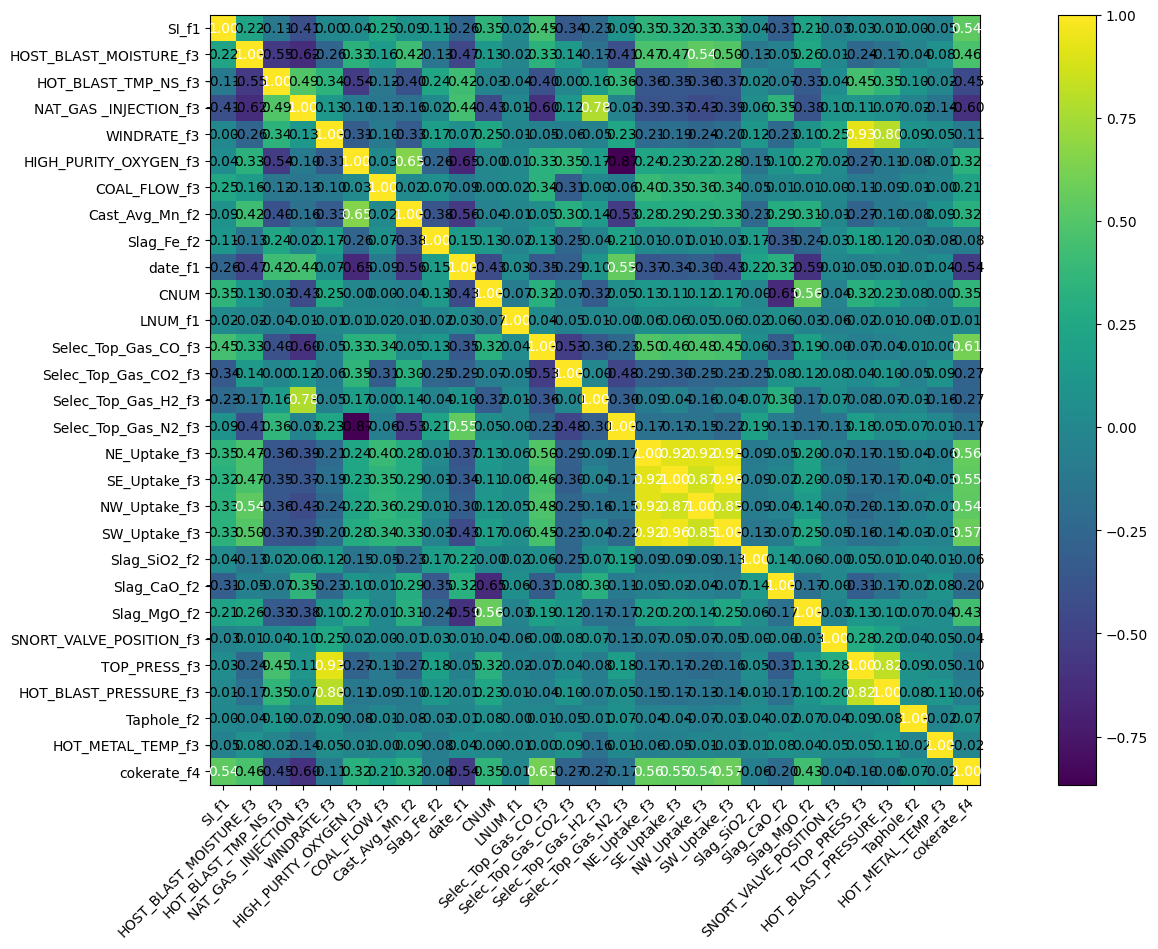

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1     0.719500  2022-01-01 00:45:00                4.242439   
2     0.710486  2022-01-01 08:43:00                4.174343   
3     0.666106  2022-01-01 10:17:00                4.126144   
4     0.675145  2022-01-01 12:40:00                4.120736   
5     0.776831  2022-01-01 15:06:00                4.120331   
...        ...                  ...                     ...   
1390  0.762500  2021-12-31 13:10:00                4.204430   
1391  0.646000  2021-12-31 14:41:00                4.208539   
1392  0.654667  2021-12-31 16:15:00                4.212648   
1393  0.591667  2021-12-31 17:40:00                4.217784   
1394  0.724667  2021-12-31 19:31:00                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1             2161.425209            9306.840913   184.818611   
2             2168.238915            9336.364456   185.993447   
3             2167.779119            9419.200115   185.828474   
4             2166.974740            9564.165802   185.924481   
5             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1390          2169.361647            9297.484543   185.046491   
1391          2169.079601            9312.779010   185.053796   
1392          2168.797556            9303.753420   185.007919   
1393          2168.444999            9333.448101   184.942435   
1394          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
1                       0.0           0.0           0.354        0.16   
2                       0.0           0.0           0.313        0.83   
3                       0.0           0.0           0.360        0.10   
4                       0.0           0.0           0.319        0.34   
5                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1390                    0.0           0.0           0.343        0.30   
1391                    0.0           0.0           0.324        0.30   
1392                    0.0           0.0           0.325        0.16   
1393                    0.0           0.0           0.335        0.26   
1394                    0.0           0.0           0.328        1.08   

      date_f1    CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1     44562.0     2.0  168.666667            21.080431             18.313322   
2     44562.0     6.0  137.450000            20.996415             18.311768   
3     44562.0     7.0  156.684211            20.749627             18.341701   
4     44562.0     8.0  150.869919            20.609259             18.644476   
5     44562.0     9.0  160.218182            20.617383             18.845791   
...       ...     ...         ...                  ...                   ...   
1390  44561.0  4344.0  147.500000            21.039583             18.308225   
1391  44561.0  4345.0  147.500000            21.043999             18.308776   
1392  44561.0  4346.0  174.000000            21.048415             18.309327   
1393  44561.0  4347.0  160.000000            21.053935             18.310016   
1394  44561.0  4348.0  149.333333            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1                4.131228            54.940123    171.769513    182.533770   
2                4.133911            55.072779    170.595469    183.725050   
3                4.137632            55.375043    167.017421    195.812061   
4                4.142824            55.341884    154.214917    188.028883   
5                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1390             4.129485            55.162782    167.619915    185.900341   
1391     


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [12]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [14]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1389  0.109500    0.004444  0.762500                4.204430   
1390 -0.116500    0.008900  0.646000                4.208539   
1391  0.008667   -0.037618  0.654667                4.212648   
1392 -0.063000   -0.014340  0.591667                4.217784   
1393  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1389          2169.361647            9297.484543   185.046491   
1390          2169.079601            9312.779010   185.053796   
1391          2168.797556            9303.753420   185.007919   
1392          2168.444999            9333.448101   184.942435   
1393          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                       0.0    0   45     0    1      1  2022           0.0   
1                       0.0    0   43     8    1      1  2022           0.0   
2                       0.0    0   17    10    1      1  2022           0.0   
3                       0.0    0   40    12    1      1  2022           0.0   
4                       0.0    0    6    15    1      1  2022           0.0   
...                     ...  ...  ...   ...  ...    ...   ...           ...   
1389                    0.0    0   10    13   31     12  2021           0.0   
1390                    0.0    0   41    14   31     12  2021           0.0   
1391                    0.0    0   15    16   31     12  2021           0.0   
1392                    0.0    0   40    17   31     12  2021           0.0   
1393                    0.0    0   31    19   31     12  2021           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.354        0.16     2.0            21.080431   
1              0.313        0.83     6.0            20.996415   
2              0.360        0.10     7.0            20.749627   
3              0.319        0.34     8.0            20.609259   
4              0.335        0.28     9.0            20.617383   
...              ...         ...     ...                  ...   
1389           0.343        0.30  4344.0            21.039583   
1390           0.324        0.30  4345.0            21.043999   
1391           0.325        0.16  4346.0            21.048415   
1392           0.335        0.26  4347.0            21.053935   
1393           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                  ...                  ...   
1389             18.308225             4.129485            55.162782   
1390             18.308776             4.129674            55.162767   
1391             18.309327             4.129862            55.140373   
1392  


## Correlation Matrix


In [15]:

def simple_plot_correlation_matrix( res ):
        print(  res.info()  )
        print(  res.shape   )
        headers_list = ['delta_SI', 'mov_avg_SI', 'SI_f1', 'HOST_BLAST_MOISTURE_f3', 'HOT_BLAST_TMP_NS_f3', 
                        'NAT_GAS _INJECTION_f3', 'WINDRATE_f3', 'HIGH_PURITY_OXYGEN_f3',  
                        'month', 'COAL_FLOW_f3', 'Cast_Avg_Mn_f2', 'Slag_Fe_f2', 
                        'CNUM', 'Selec_Top_Gas_CO_f3', 'Selec_Top_Gas_CO2_f3', 'Selec_Top_Gas_H2_f3', 
                        'Selec_Top_Gas_N2_f3', 'NE_Uptake_f3', 'SE_Uptake_f3', 'NW_Uptake_f3', 'SW_Uptake_f3', 
                        'Slag_SiO2_f2', 'Slag_CaO_f2', 'Slag_MgO_f2', 'SNORT_VALVE_POSITION_f3', 'TOP_PRESS_f3', 
                        'HOT_BLAST_PRESSURE_f3', 'Taphole_f2', 'HOT_METAL_TEMP_f3', 'cokerate_f4']
        ## headers_list = res.columns.values.tolist()
        print(  headers_list  )
        cm = np.corrcoef(  res[ headers_list ].values.T  )
        hm = heatmap(cm, row_names= headers_list, column_names=headers_list, figsize=[20,10])
        plt.show()


In [16]:

'''

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  
                     tsDataWrangling_obj.for_RNN_data_CIVS    
)


'''



'\n\ntsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  \n                     tsDataWrangling_obj.for_RNN_data_CIVS    \n)\n\n\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   delta_SI                 1394 non-null   float64
 1   mov_avg_SI               1394 non-null   float64
 2   SI_f1                    1394 non-null   float64
 3   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 4   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 5   NAT_GAS _INJECTION_f3    1394 non-null   float64
 6   WINDRATE_f3              1394 non-null   float64
 7   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 8   sec                      1394 non-null   int64  
 9   min                      1394 non-null   int64  
 10  hour                     1394 non-null   int64  
 11  day                      1394 non-null   int64  
 12  month                    1394 non-null   int64  
 13  year                     1394 non-null   int64  
 14  COAL_FLOW_f3            

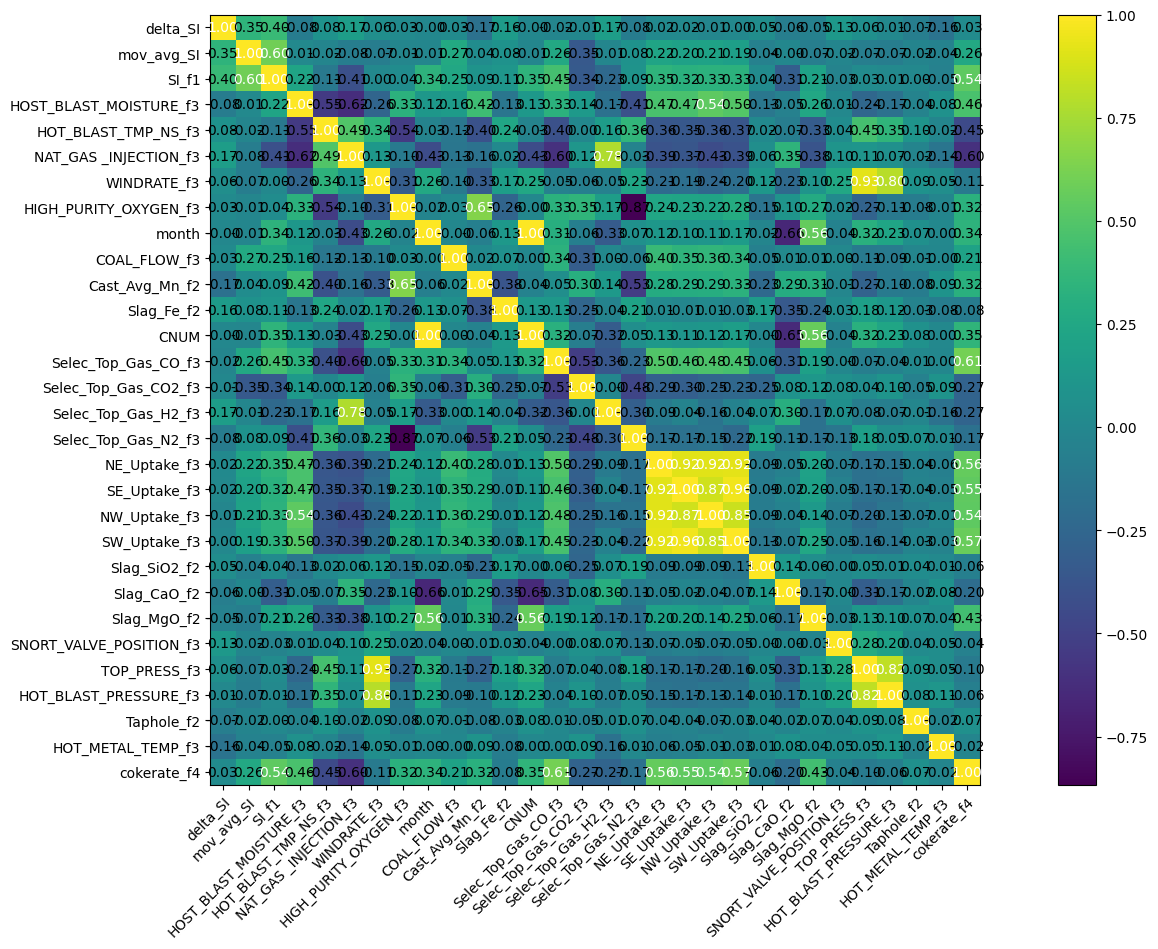

In [17]:


simple_plot_correlation_matrix( tsDataWrangling_obj.for_RNN_data_CIVS   )




## Pass Wrangled data to GPT experimenter


In [18]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


1394



## Training Functions


In [19]:

def augment_xb(xb, std_factor=0.01, time_mask_prob=0.0, feature_mask_prob=0.0):
    # --- Add Gaussian noise ---
    std = xb.std(dim=(0, 1), keepdim=True) + 1e-6
    noise = torch.randn_like(xb) * std_factor * std
    xb = xb + noise

    # --- Optional: Time masking ---
    if time_mask_prob > 0.0:
        batch_size, seq_len, _ = xb.shape
        for i in range(batch_size):
            if torch.rand(1).item() < time_mask_prob:
                t = torch.randint(0, seq_len, (1,))
                xb[i, t] = 0.0  # or xb[i, t] = xb[i, max(t - 1, 0)]

    # --- Optional: Feature masking ---
    if feature_mask_prob > 0.0:
        _, _, feature_dim = xb.shape
        mask = torch.rand(feature_dim) < feature_mask_prob
        xb[..., mask] = 0.0

    return xb




In [20]:

def custom_loss_ratio(pred, real, mse_weight=0.8, log_ratio_weight=0.2):
    eps = 1e-6
    safe_ratio = torch.clamp(torch.abs((pred + eps) / (real + eps)), min=0.1, max=10.0)
    log_ratio = torch.log(safe_ratio + eps)
    ratio_loss = torch.mean(log_ratio ** 2)
    mse_loss = F.mse_loss(pred, real)
    return mse_weight * mse_loss + log_ratio_weight * ratio_loss



In [21]:

import torch

def log_cosh_loss(pred, target):
    """
    Computes the log-cosh loss between predictions and targets.
    This is smoother than MSE and less sensitive to outliers.

    Args:
        pred (Tensor): Predicted values (e.g., pred_si)
        target (Tensor): Ground truth values (e.g., y_si)

    Returns:
        Tensor: Scalar loss
    """
    return torch.mean(torch.log(torch.cosh(pred - target + 1e-6)))



In [22]:

def custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25, clip_low=0.5, clip_high=2.0):
    """
    Parameters:
    - loss_SI: torch.Tensor (scalar) — Loss on the silicon prediction
    - loss_all: torch.Tensor (scalar) — Loss on the full feature vector
    - beta: float — weight for ratio regularization
    - desired_ratio: float — the target ratio of SI loss to total loss
    - clip_low, clip_high: float — clipping bounds for the loss ratio (like PPO)

    Returns:
    - loss_total: torch.Tensor (scalar)
    """

    # Compute the raw ratio
    raw_ratio = loss_SI / (loss_all.detach() + 1e-8)

    # Clip the ratio like PPO to prevent extreme swings
    clipped_ratio = torch.clamp(raw_ratio, clip_low, clip_high)

    # Use clipped ratio to weight the loss dynamically
    weighted_SI = clipped_ratio * loss_SI
    weighted_all = (1 - clipped_ratio) * loss_all

    # Main loss component (adaptive weighting)
    loss_main = weighted_SI + weighted_all

    # Regularization to encourage a specific SI/total ratio (stabilizes dynamics)
    loss_total_for_ratio = loss_SI + loss_all + 1e-8
    actual_ratio = loss_SI / loss_total_for_ratio
    ratio_reg = (actual_ratio - desired_ratio).pow(2)

    # Combine total loss
    loss_total = loss_main + beta * ratio_reg

    return loss_total



In [23]:


def function_train_rc(train_CIVS_2, reasoning_steps=1, backprop_through_steps=False):
    
    
    model     = Time_Series_GPT.Time_Series_GPT(tsGPT_obj).to(tsGPT_obj.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=tsGPT_obj.learning_rate, weight_decay=1e-4)

    criterion = nn.MSELoss()

    history = {
        'loss': [], 'test_loss': [],
        'loss_A': [], 'loss_B': [], 'loss_C': [],
        'loss_SIM0': [], 'loss_SIM1': [], 'loss_SIM2': [],
        'loss_SIM3': [], 'loss_SIM4': [], 'loss_SIM5': []
    }

    
 
    train_CIVS_tr, x_means, x_standard_devs = tsGPT_obj.standardize_x_scales(train_CIVS_2)
    train_CIVS_tr_scaled                    = (train_CIVS_tr - x_means) / x_standard_devs
    
    torch.set_printoptions(sci_mode=False)
    
  

    model.train()
    
    pred_mean              = None  # will be initialized with first prediction
    schedule_smooth_factor = 0.9       # smoothing factor (you can tune this)
    
    for batch_i, epoch in enumerate(range(tsGPT_obj.max_iters)):
        
        xb, yb = tsGPT_obj.get_batch( train_CIVS_tr_scaled )  # shapes: [B, T, F]
        
       
    
            
        # === AUGMENT ONLY DURING TRAINING ===
        if model.training:
            xb = augment_xb(xb, std_factor=0.01, time_mask_prob=0.1, feature_mask_prob=0.1)

        
        idx_pred, pred_si = model(
            xb, 
            targets=None, 
            reasoning_steps=reasoning_steps,
            backprop_through_steps=backprop_through_steps,
            return_si=True  
        )  
        
        if pred_mean is None:
            pred_mean   = idx_pred.detach()
        else:
            # Exponential moving average update
            pred_mean   = schedule_smooth_factor * idx_pred.detach() + (1 - schedule_smooth_factor) * pred_mean
    
        B, T, E = xb.shape
        
        pred_si = pred_si.squeeze(2)
        
        
        
        ###################################################################################
        
        ## loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 10 of 10
        
        if batch_i < tsGPT_obj.max_iters*0.1:
            ## loss = criterion(pred, real)  # use true labels early
            loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb) 
        else:
            if batch_i % 2 == 0:
                loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)
            else:
                ## Option1: with mean
                ##loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , pred_mean)
                ## loss_all   = criterion(pred, pred_mean)  # self-target later
                
                # Or Option 2: Blended ground truth (replace above line with this)
                blend = max(0.0, 1.0 - batch_i / (tsGPT_obj.max_iters * 0.9))
                pred_target = blend * yb + (1 - blend) * idx_pred.detach()
                loss_all = criterion(idx_pred[:, -tsGPT_obj.block_size :, :], pred_target)

        
        y_si        =  yb[:, :, 2]     ## [B, 10, 1]
        
        ###################################################################################
        
        
        ## pred_si = pred_si[:, :3]
        ## y_si    =    y_si[:, :3]
        
        star         = 1.0
       
        loss_mse     = F.mse_loss(    pred_si, y_si)
        loss_cosh    = log_cosh_loss( pred_si, y_si)
        loss_SI_main = star * loss_mse + (1-star) * loss_cosh
        loss_SI      = loss_SI_main
        
        ###################################################################################
        
        alpha = 9.0
        
        ## loss_total = alpha * loss_SI + (1 - alpha) * loss_all 
        ## loss_total = (1 - alpha) * loss_all + alpha * criterion( idx_pred[:, 8:10], yb[:, 8:10] )
        
        main_loss       = criterion(idx_pred[:, 8:], yb[:, 8:])  # focus on final steps
        smoothness_loss = F.mse_loss(idx_pred[:, 0], idx_pred[:, -1])  # or across time steps
        loss_total      = main_loss + 0.01 * smoothness_loss

        
        ###################################################################################
        
        optimizer.zero_grad(set_to_none=True)
        loss_total.backward()
        optimizer.step()
         

        # === Logging ===
        history['loss'].append(loss_total.item())
        history['loss_A'].append(loss_SI.item())
        history['loss_B'].append(loss_all.item())
        history['loss_C'].append(0)

        # Placeholders if Curve_SIMs aren't defined
        history['loss_SIM0'].append(0)
        history['loss_SIM1'].append(0)
        

        # === Debug Print ===
        if batch_i % 200 == 0:
            print(f"[{batch_i}] Train Loss: {loss_total.item():.6f}")
            print("Loss_SI:", loss_SI.item(), "Loss_all:", loss_all.item())
            ## print("Prediction shape:", pred.shape)
            print("===")

    tsGPT_obj.plot_losses_training(history)
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled






## Train on Train, Test on Test



## Run 1


In [24]:

all_real_si_300to400 = []
all_pred_si_300to400 = []

all_real_si_200to400 = []
all_pred_si_200to400 = []

all_real_si_100to400 = []
all_pred_si_100to400 = []

all_real_si_000to400 = []
all_pred_si_000to400 = []


In [25]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.030053
Loss_SI: 1.1307452917099 Loss_all: 1.0809835195541382
===


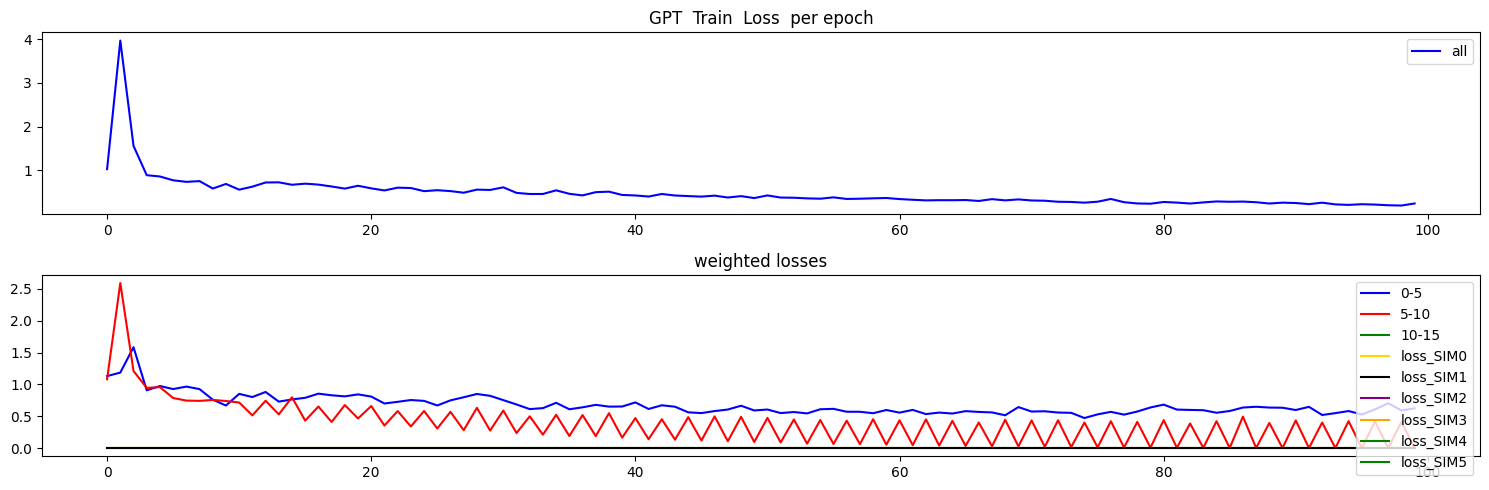

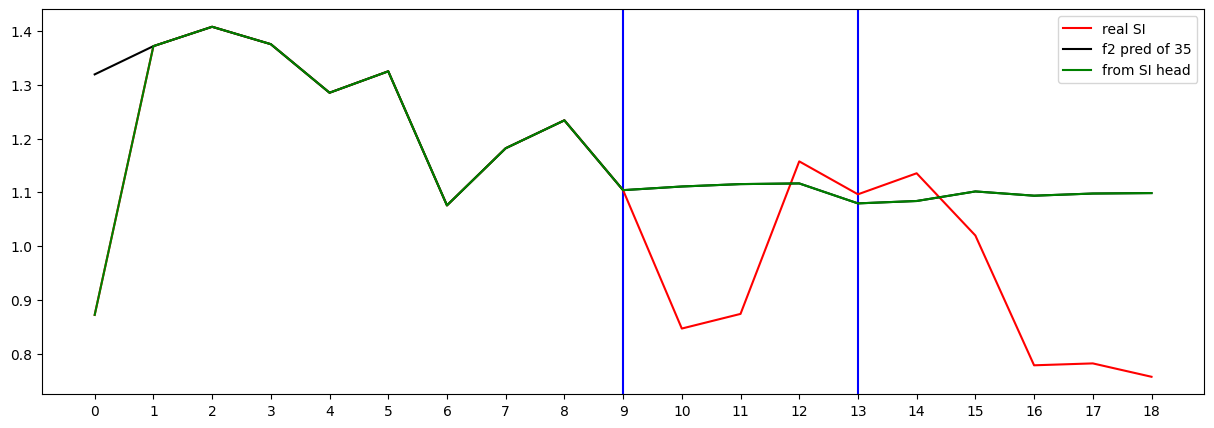

Testing R**2 - (all) - (no inputs):  0.9942290935311362
Testing R**2 - (f2) - SI full (no inputs):  -1.0712480797959318
Testing R**2 - SI head only (no inputs):  -1.0712480797959318
0 ...index R**2 (no inputs):  -0.29537122402485627
1 ...index R**2 (no inputs):  -9.179437423284655
2 ...index R**2 (no inputs):  -1.0712480797959318
3 ...index R**2 (no inputs):  -333.9472156155992
4 ...index R**2 (no inputs):  -0.4332778878639616
5 ...index R**2 (no inputs):  -3.108228164866267
6 ...index R**2 (no inputs):  -89.8714101839958
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.6469639318397653
10 ...index R**2 (no inputs):  -1.7304786835370676
11 ...index R**2 (no inputs):  -33.95263705681737
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.17544097710502937
16 ...index R**2 (no inputs):  -0.7447631491315188
17 ...index R**2 (no inputs):  -183.392316691

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk300to400_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 1.239820
Loss_SI: 1.2044165134429932 Loss_all: 1.2742186784744263
===


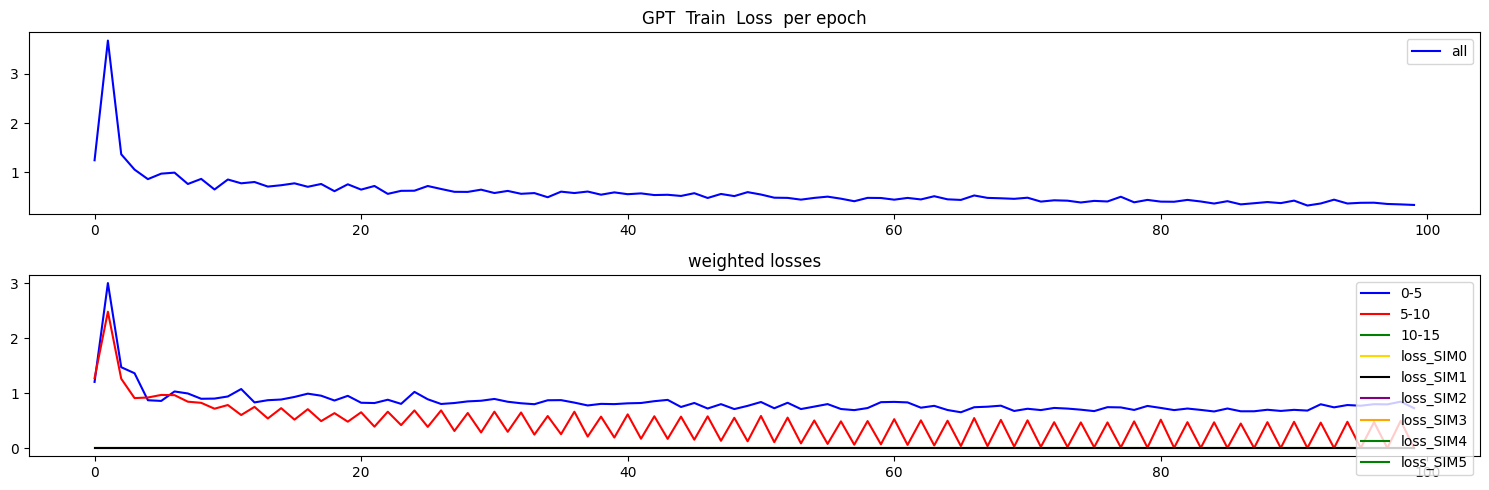

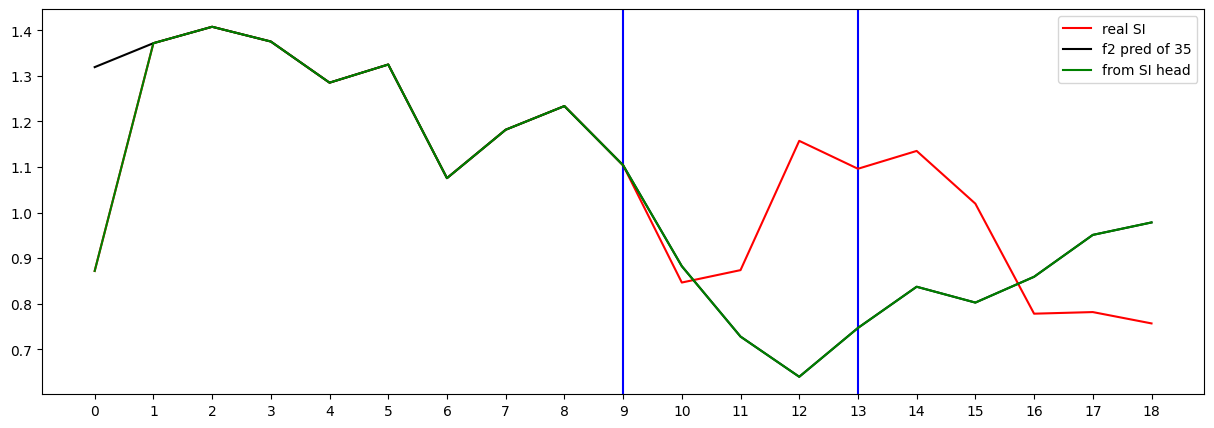

Testing R**2 - (all) - (no inputs):  0.9709103864185997
Testing R**2 - (f2) - SI full (no inputs):  -2.013219749223551
Testing R**2 - SI head only (no inputs):  -2.013219749223551
0 ...index R**2 (no inputs):  -1.2789638007224942
1 ...index R**2 (no inputs):  -5.487221388997802
2 ...index R**2 (no inputs):  -2.013219749223551
3 ...index R**2 (no inputs):  -527.5083622066659
4 ...index R**2 (no inputs):  -0.3724212646299032
5 ...index R**2 (no inputs):  -19.827385911189566
6 ...index R**2 (no inputs):  -18914.199600047497
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.22475965824615574
10 ...index R**2 (no inputs):  -3.3365931347236106
11 ...index R**2 (no inputs):  -73.84867814475403
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -11.060140225138243
16 ...index R**2 (no inputs):  -1.3484106290155315
17 ...index R**2 (no inputs):  -162.7548895517

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk200to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.356632
Loss_SI: 1.0632238388061523 Loss_all: 1.1954044103622437
===


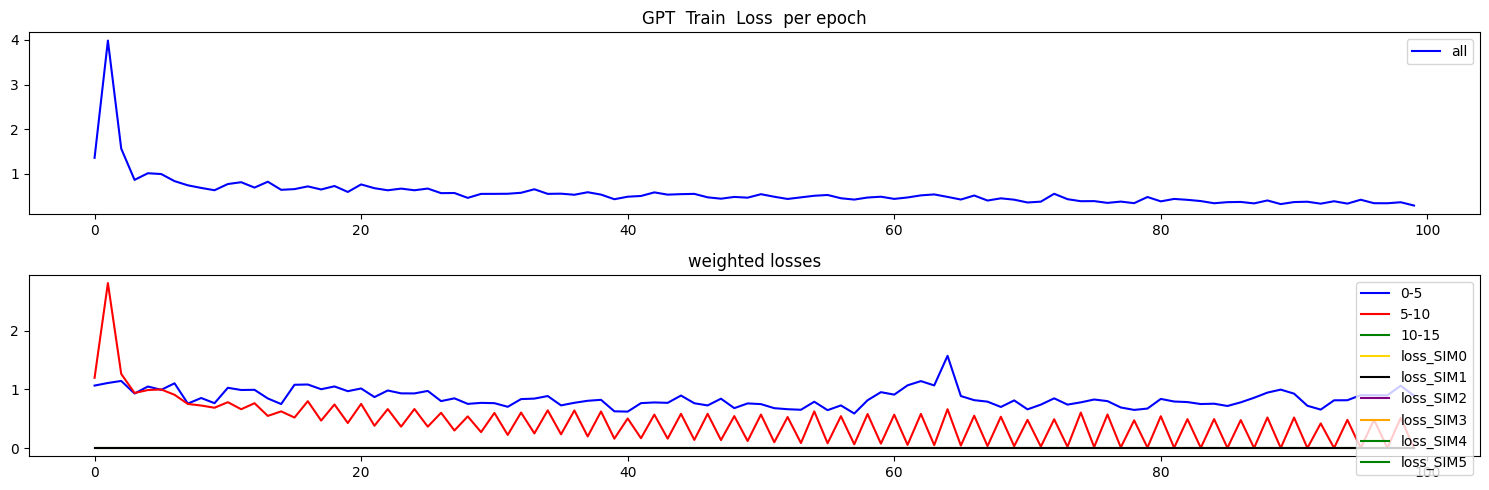

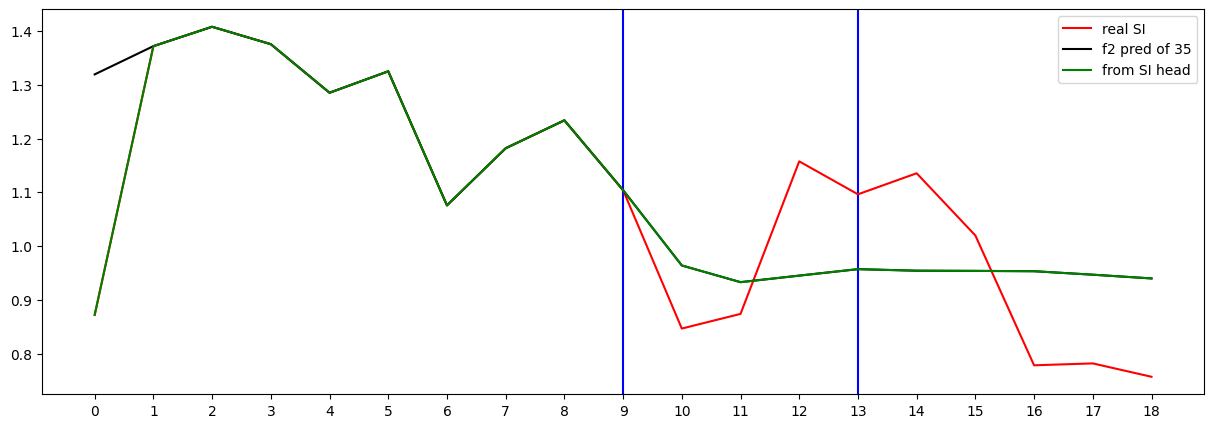

Testing R**2 - (all) - (no inputs):  0.9950776527797622
Testing R**2 - (f2) - SI full (no inputs):  -0.040141418698619535
Testing R**2 - SI head only (no inputs):  -0.040141418698619535
0 ...index R**2 (no inputs):  -0.21722412041046457
1 ...index R**2 (no inputs):  -3.1517182008092606
2 ...index R**2 (no inputs):  -0.040141418698619535
3 ...index R**2 (no inputs):  -53.789879299688586
4 ...index R**2 (no inputs):  -0.5689664782265766
5 ...index R**2 (no inputs):  -2.377151167762769
6 ...index R**2 (no inputs):  -82.53685449620039
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.5278154540337203
10 ...index R**2 (no inputs):  -0.042086583959795254
11 ...index R**2 (no inputs):  -482.1149430969709
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.3327584779273818
16 ...index R**2 (no inputs):  -0.5099866471666907
17 ...index R**2 (no inputs):  -241

In [28]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk100to400_train,  
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 1.325358
Loss_SI: 1.1169452667236328 Loss_all: 1.3347591161727905
===


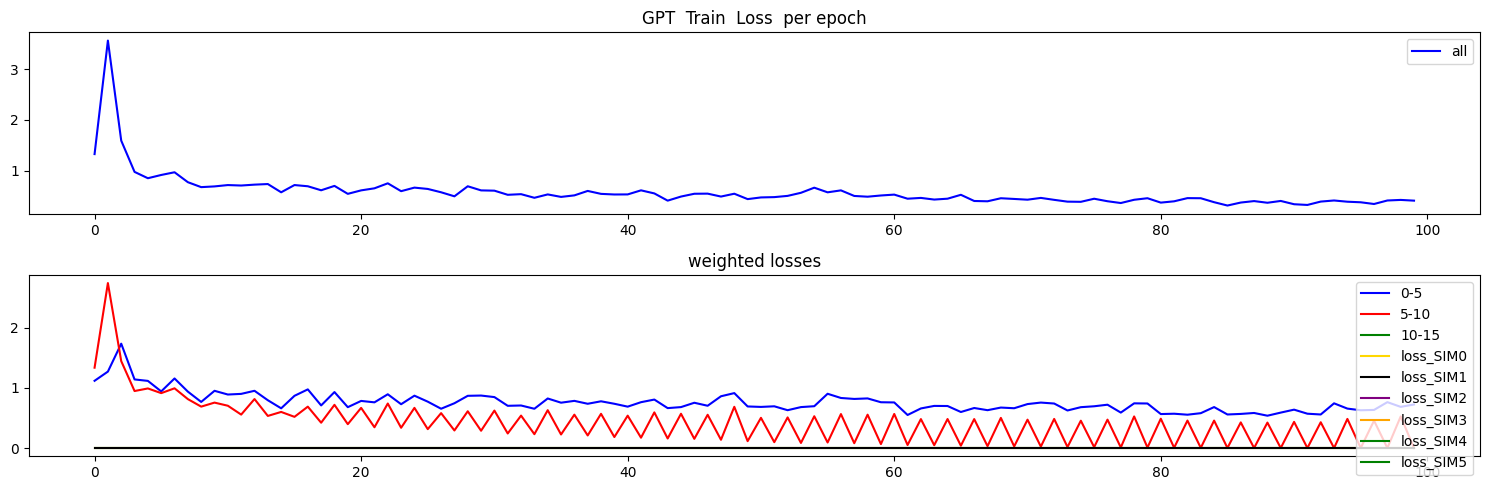

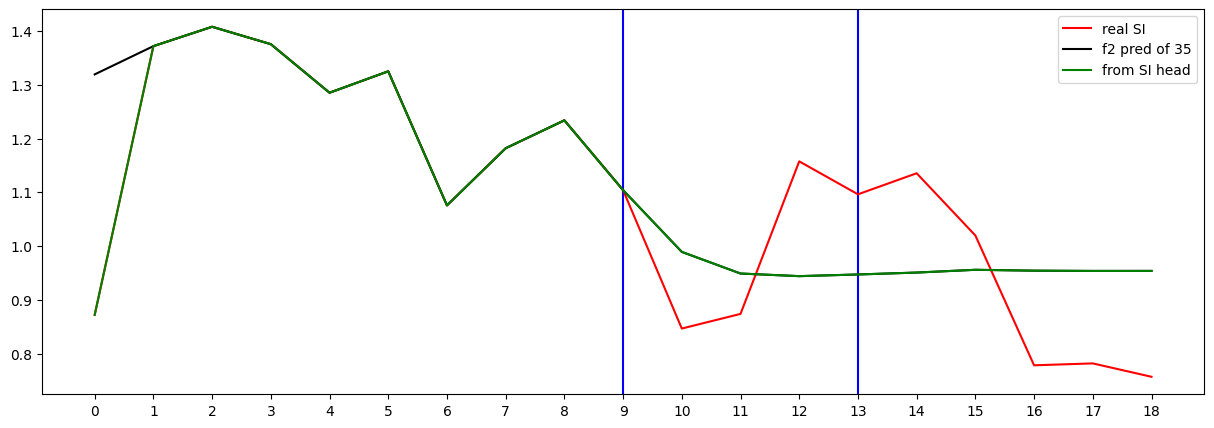

Testing R**2 - (all) - (no inputs):  0.9871597122664646
Testing R**2 - (f2) - SI full (no inputs):  -0.0806176079553178
Testing R**2 - SI head only (no inputs):  -0.0806176079553178
0 ...index R**2 (no inputs):  -0.43202479800070326
1 ...index R**2 (no inputs):  -3.5408423991805718
2 ...index R**2 (no inputs):  -0.0806176079553178
3 ...index R**2 (no inputs):  -385.936188979567
4 ...index R**2 (no inputs):  -0.1604240835791888
5 ...index R**2 (no inputs):  -8.20021374435277
6 ...index R**2 (no inputs):  -160.0009133312188
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.18345329335705451
10 ...index R**2 (no inputs):  -0.22095326183976294
11 ...index R**2 (no inputs):  -28.62950148589472
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.0591164205677592
16 ...index R**2 (no inputs):  -0.3469221631249233
17 ...index R**2 (no inputs):  -614.21204020

In [29]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk000to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 2


In [30]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.094960
Loss_SI: 0.797730565071106 Loss_all: 1.1676946878433228
===


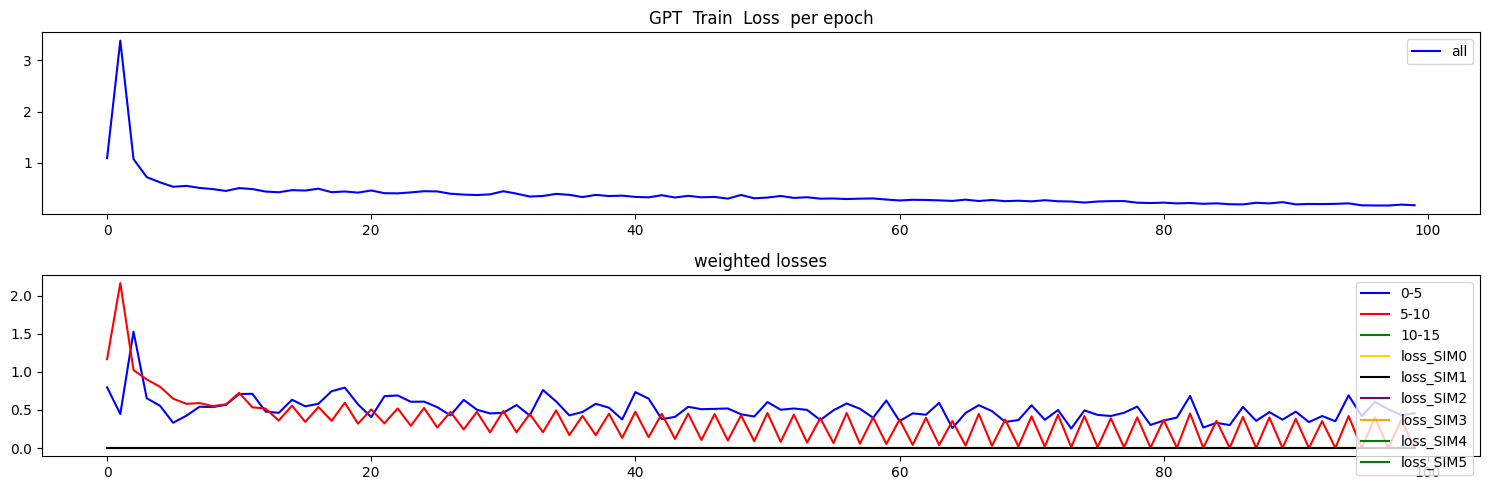

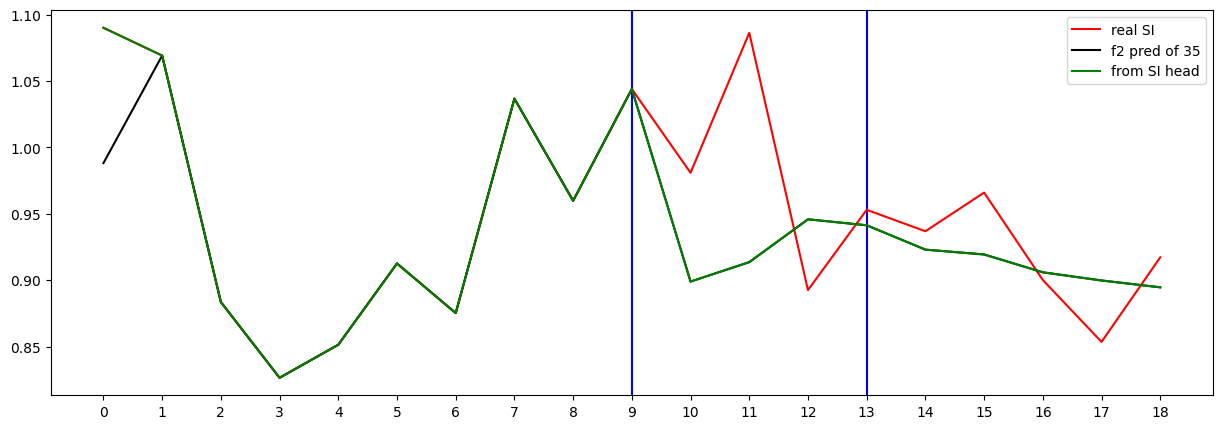

Testing R**2 - (all) - (no inputs):  0.9891988389571256
Testing R**2 - (f2) - SI full (no inputs):  -0.4490536523637052
Testing R**2 - SI head only (no inputs):  -0.4490536523637052
0 ...index R**2 (no inputs):  -0.3755904693737966
1 ...index R**2 (no inputs):  -0.19565324290446284
2 ...index R**2 (no inputs):  -0.4490536523637052
3 ...index R**2 (no inputs):  -244.8475043330321
4 ...index R**2 (no inputs):  -49.43015520599833
5 ...index R**2 (no inputs):  -18.7331264284132
6 ...index R**2 (no inputs):  -15.361280107609506
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.8186675514784936
10 ...index R**2 (no inputs):  0.17469839616275196
11 ...index R**2 (no inputs):  -22.292083133639142
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.4985330486587036
16 ...index R**2 (no inputs):  -0.16600357536790677
17 ...index R**2 (no inputs):  -43.80631920

In [31]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk300to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 1.226214
Loss_SI: 1.3561667203903198 Loss_all: 1.212735891342163
===


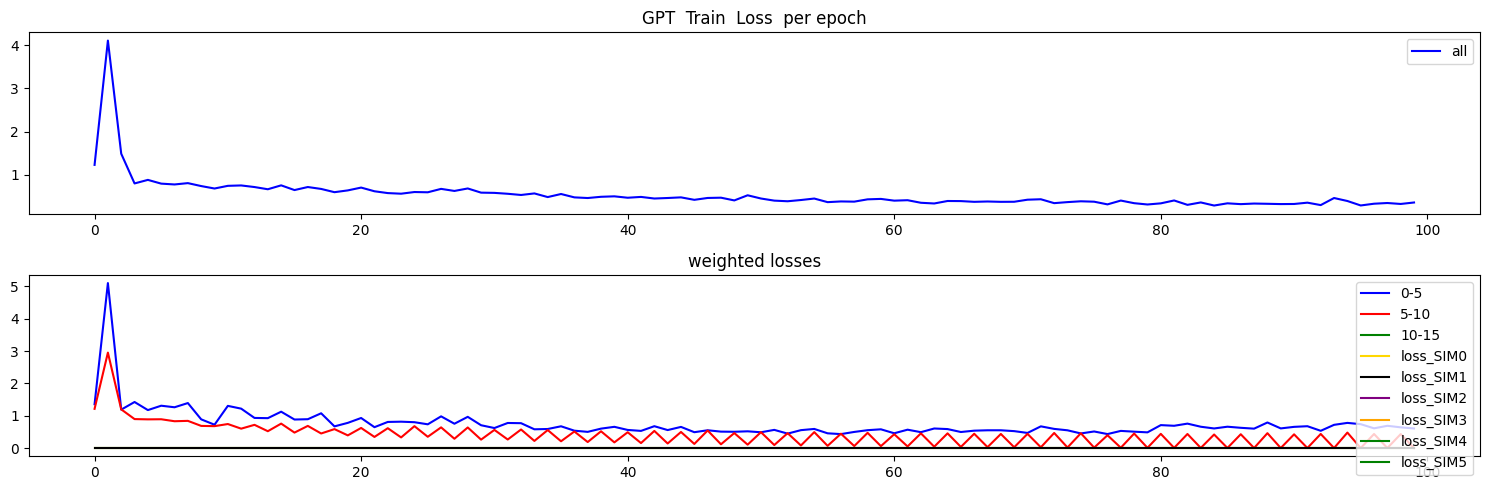

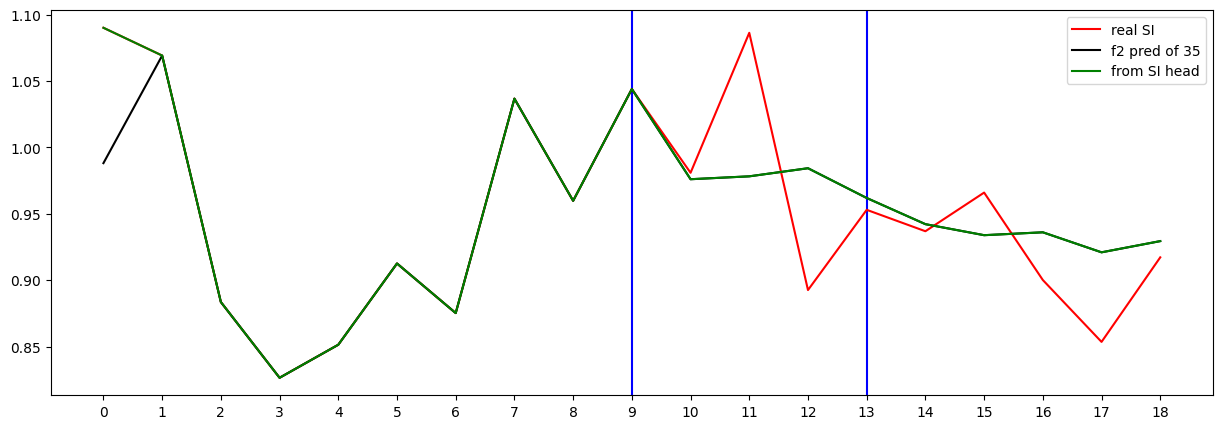

Testing R**2 - (all) - (no inputs):  0.9616931345944117
Testing R**2 - (f2) - SI full (no inputs):  -0.015940198028167707
Testing R**2 - SI head only (no inputs):  -0.015940198028167707
0 ...index R**2 (no inputs):  -0.294964788134644
1 ...index R**2 (no inputs):  0.17690620843681126
2 ...index R**2 (no inputs):  -0.015940198028167707
3 ...index R**2 (no inputs):  -1189.26691644702
4 ...index R**2 (no inputs):  -24.80101947912147
5 ...index R**2 (no inputs):  -69.18738177442627
6 ...index R**2 (no inputs):  -12.460936267757521
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -2.188630155329163
10 ...index R**2 (no inputs):  0.09733822694196692
11 ...index R**2 (no inputs):  -83.12062007368534
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.934630270175039
16 ...index R**2 (no inputs):  -0.13298839693676534
17 ...index R**2 (no inputs):  -94.7500461

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk200to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.174906
Loss_SI: 1.262171983718872 Loss_all: 1.214962124824524
===


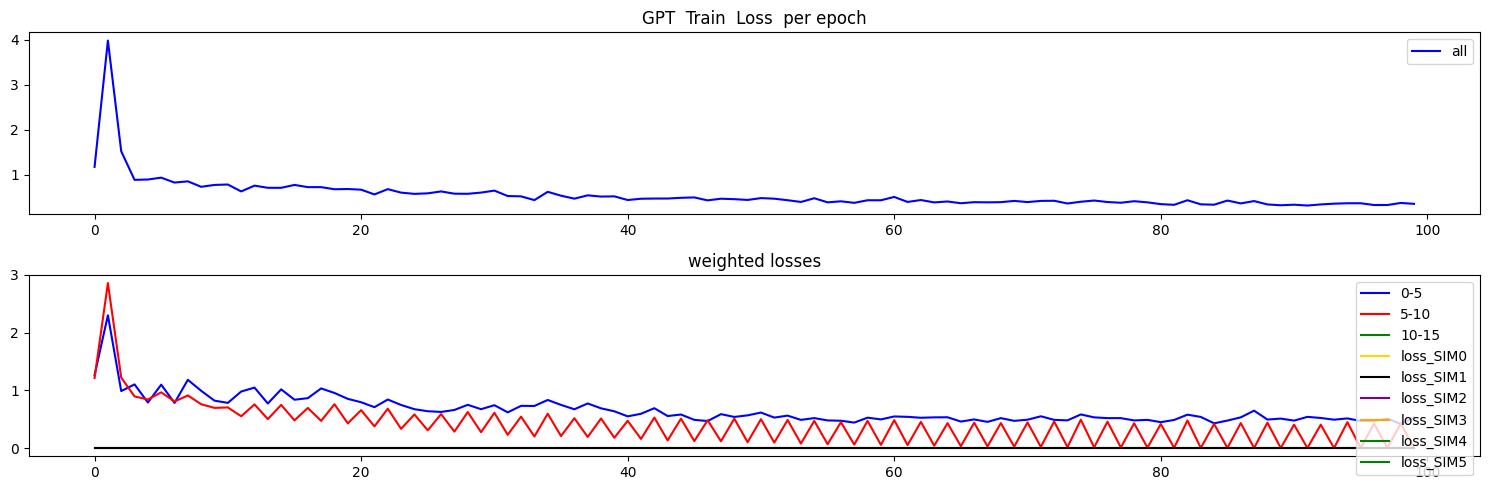

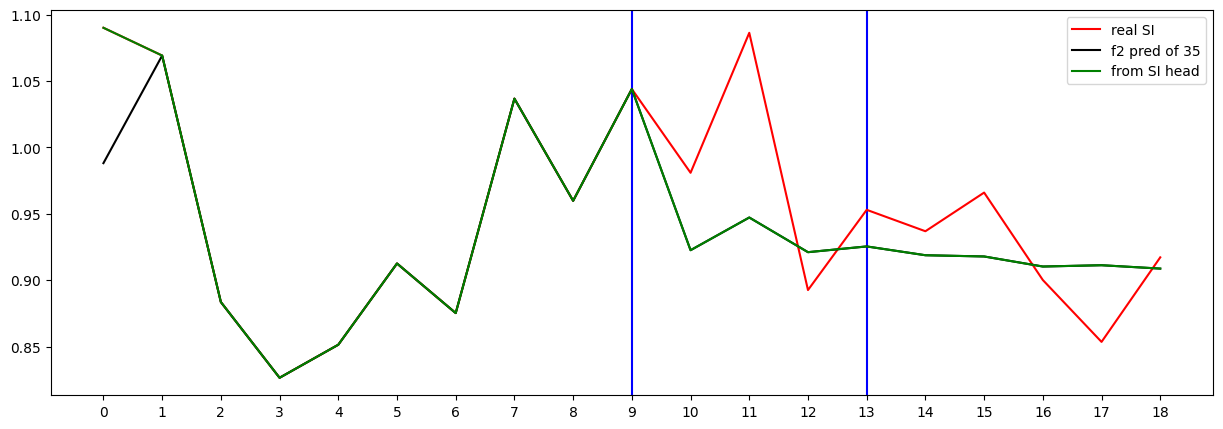

Testing R**2 - (all) - (no inputs):  0.998178674501914
Testing R**2 - (f2) - SI full (no inputs):  -0.2757819817970568
Testing R**2 - SI head only (no inputs):  -0.2757819817970568
0 ...index R**2 (no inputs):  -0.10744863019067163
1 ...index R**2 (no inputs):  -1.9154605096053978
2 ...index R**2 (no inputs):  -0.2757819817970568
3 ...index R**2 (no inputs):  -407.77693365752697
4 ...index R**2 (no inputs):  -58.821024074417615
5 ...index R**2 (no inputs):  -2.246997279447139
6 ...index R**2 (no inputs):  -9.586463924499284
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.9992692395774903
10 ...index R**2 (no inputs):  -0.013942260643152293
11 ...index R**2 (no inputs):  -41.61227778512654
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.1443259671375754
16 ...index R**2 (no inputs):  -0.17908984326070754
17 ...index R**2 (no inputs):  -5.5656133

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk100to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 1.093089
Loss_SI: 1.0147373676300049 Loss_all: 1.131568431854248
===


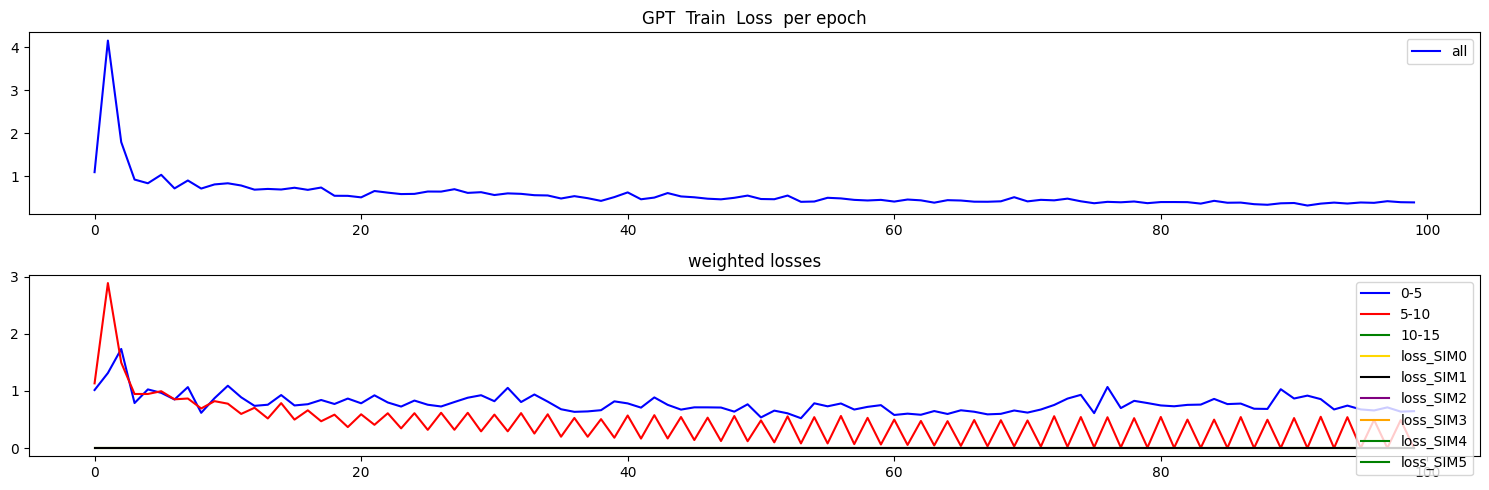

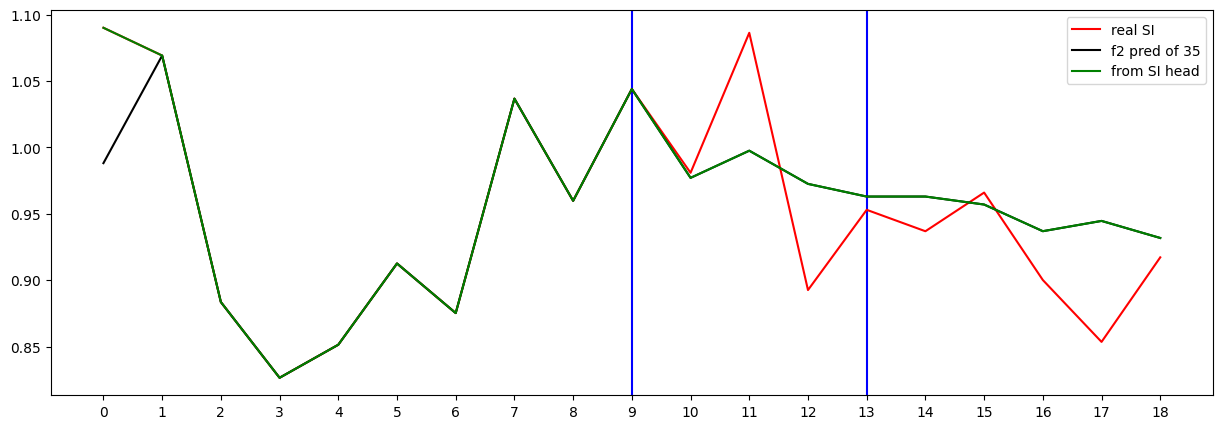

Testing R**2 - (all) - (no inputs):  0.9807703035326307
Testing R**2 - (f2) - SI full (no inputs):  -0.09968566504230258
Testing R**2 - SI head only (no inputs):  -0.09968566504230258
0 ...index R**2 (no inputs):  -0.22342901454357444
1 ...index R**2 (no inputs):  -0.31080957368891604
2 ...index R**2 (no inputs):  -0.09968566504230258
3 ...index R**2 (no inputs):  -68.66817145574007
4 ...index R**2 (no inputs):  -2.4701092113973724
5 ...index R**2 (no inputs):  -33.864244213580484
6 ...index R**2 (no inputs):  -9.22743108919733
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.8982666734037963
10 ...index R**2 (no inputs):  0.2055627595791243
11 ...index R**2 (no inputs):  -4.681176514270552
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.38461937900753207
16 ...index R**2 (no inputs):  -0.2482104353658201
17 ...index R**2 (no inputs):  -1229.173

In [34]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk000to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 3


In [35]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.268837
Loss_SI: 1.3286553621292114 Loss_all: 1.2831578254699707
===


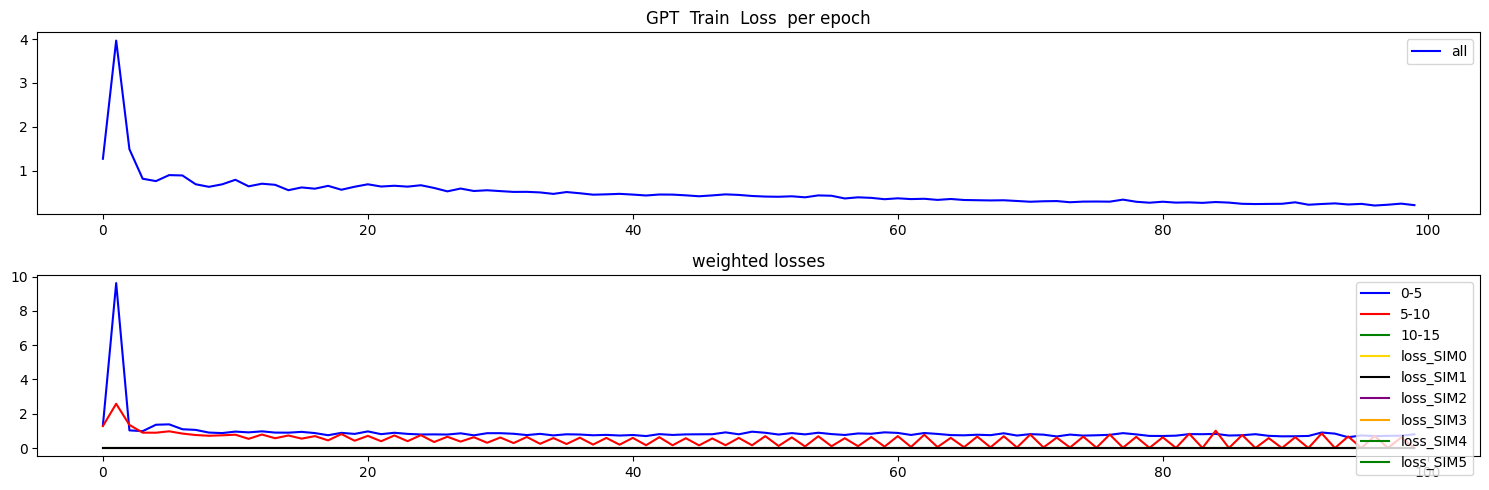

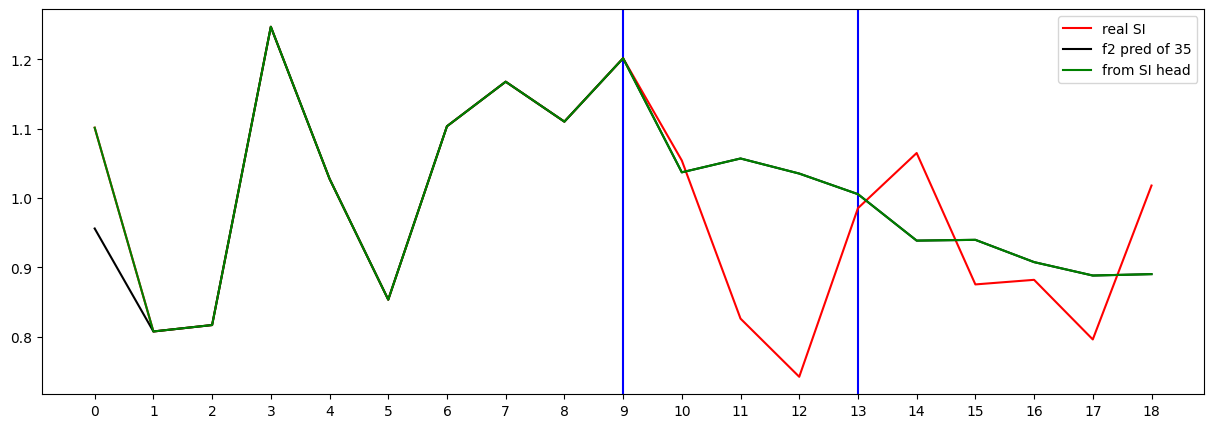

Testing R**2 - (all) - (no inputs):  0.9914152234111804
Testing R**2 - (f2) - SI full (no inputs):  -0.8176068234413025
Testing R**2 - SI head only (no inputs):  -0.8176068234413025
0 ...index R**2 (no inputs):  0.1240689835134473
1 ...index R**2 (no inputs):  -1.0186197442042815
2 ...index R**2 (no inputs):  -0.8176068234413025
3 ...index R**2 (no inputs):  -547.2650239348764
4 ...index R**2 (no inputs):  -0.5095643979444198
5 ...index R**2 (no inputs):  -0.0021256157320195257
6 ...index R**2 (no inputs):  -12.897759320296736
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.5422663064615756
10 ...index R**2 (no inputs):  -0.23831656419360248
11 ...index R**2 (no inputs):  -48.848400024300815
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.4758978053750116
16 ...index R**2 (no inputs):  -1.3426520241095088
17 ...index R**2 (no inputs):  -52.6021

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk300to400_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 0.951096
Loss_SI: 0.985927402973175 Loss_all: 1.0573195219039917
===


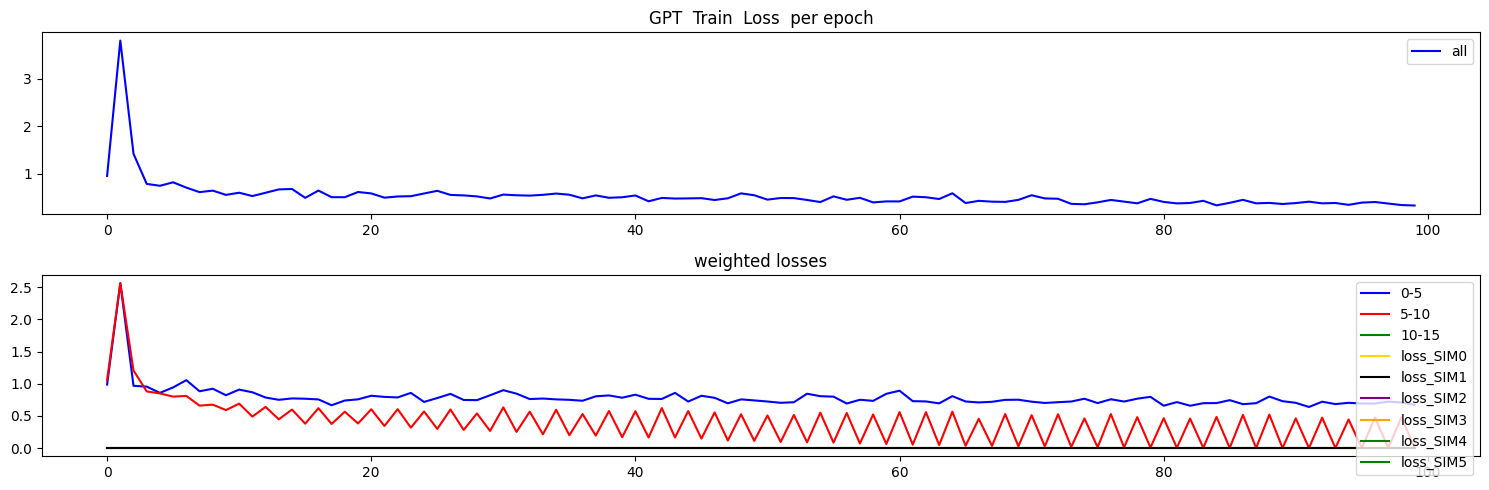

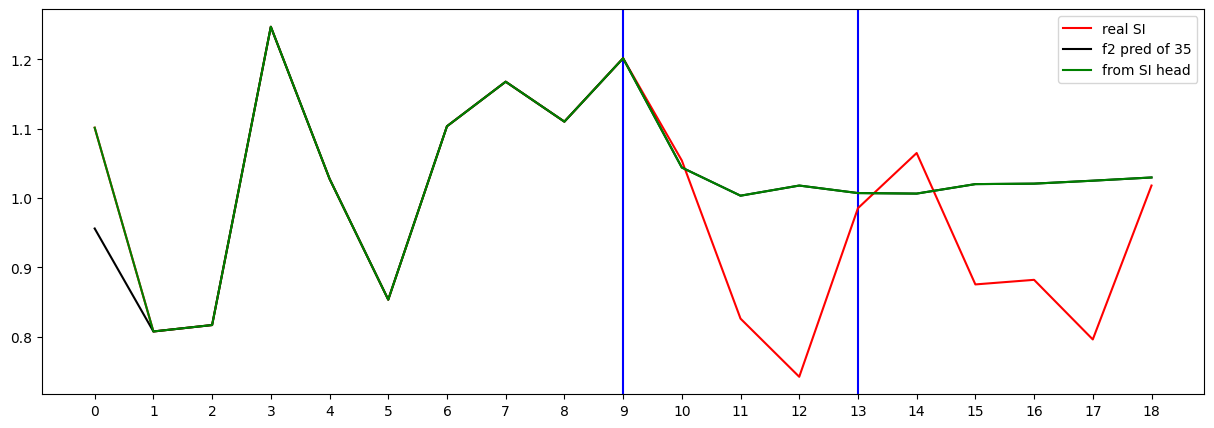

Testing R**2 - (all) - (no inputs):  0.991250589794804
Testing R**2 - (f2) - SI full (no inputs):  -0.6691208121770909
Testing R**2 - SI head only (no inputs):  -0.6691208121770909
0 ...index R**2 (no inputs):  -0.00565295366106211
1 ...index R**2 (no inputs):  -2.2435623244023004
2 ...index R**2 (no inputs):  -0.6691208121770909
3 ...index R**2 (no inputs):  -644.7373059891966
4 ...index R**2 (no inputs):  -3.065569176052457
5 ...index R**2 (no inputs):  -0.021092595392803837
6 ...index R**2 (no inputs):  -1002.3142245957877
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.14404621371039283
10 ...index R**2 (no inputs):  -0.22636546421815384
11 ...index R**2 (no inputs):  -138.78107469947747
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.28723632349322514
16 ...index R**2 (no inputs):  -1.6654027947493035
17 ...index R**2 (no inputs):  -16.860

In [37]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk200to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 1.240057
Loss_SI: 1.2373991012573242 Loss_all: 1.2024612426757812
===


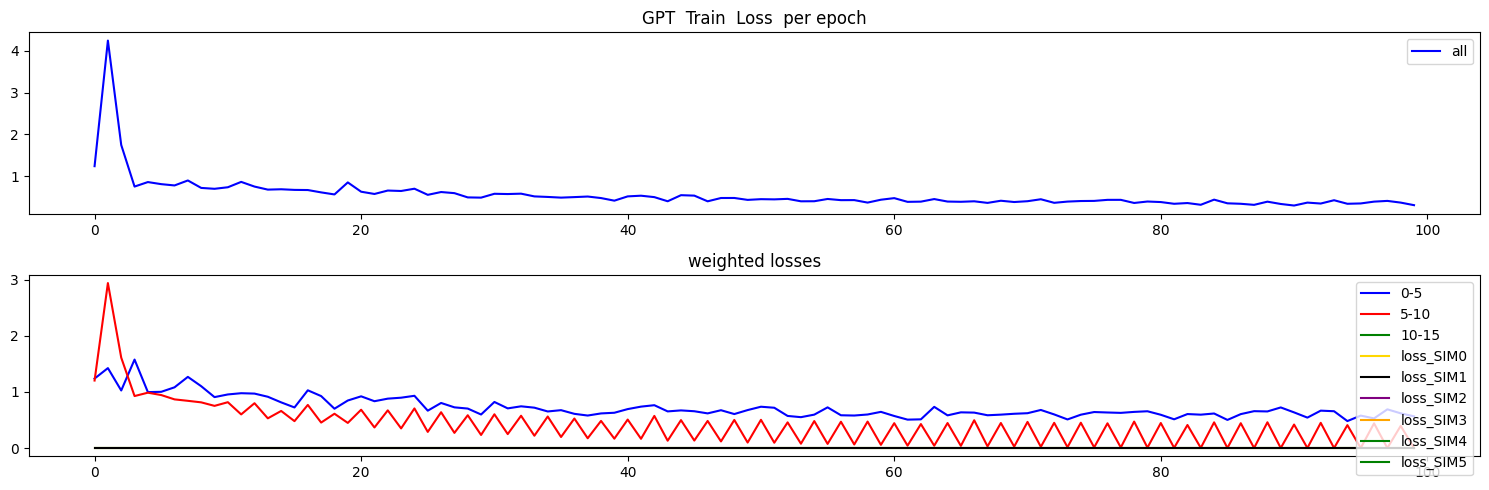

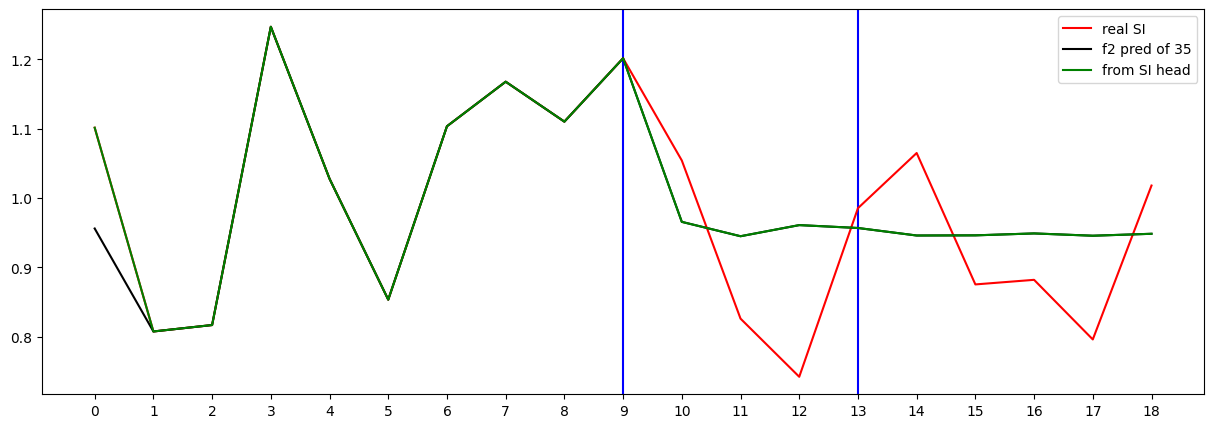

Testing R**2 - (all) - (no inputs):  0.9902898824848297
Testing R**2 - (f2) - SI full (no inputs):  -0.05475094666803382
Testing R**2 - SI head only (no inputs):  -0.05475094666803382
0 ...index R**2 (no inputs):  0.20944046232262714
1 ...index R**2 (no inputs):  -2.3866612270915817
2 ...index R**2 (no inputs):  -0.05475094666803382
3 ...index R**2 (no inputs):  -214.13291103076108
4 ...index R**2 (no inputs):  -6.715179882796418
5 ...index R**2 (no inputs):  -0.13441913549883933
6 ...index R**2 (no inputs):  -74.72553605209715
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.023280298652058162
10 ...index R**2 (no inputs):  0.08169043290751143
11 ...index R**2 (no inputs):  -146.25432329258805
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  0.179739044074828
16 ...index R**2 (no inputs):  -1.3201048009292156
17 ...index R**2 (no inputs):  -42.9142

In [38]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk100to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 1.311208
Loss_SI: 1.5071489810943604 Loss_all: 1.3550024032592773
===


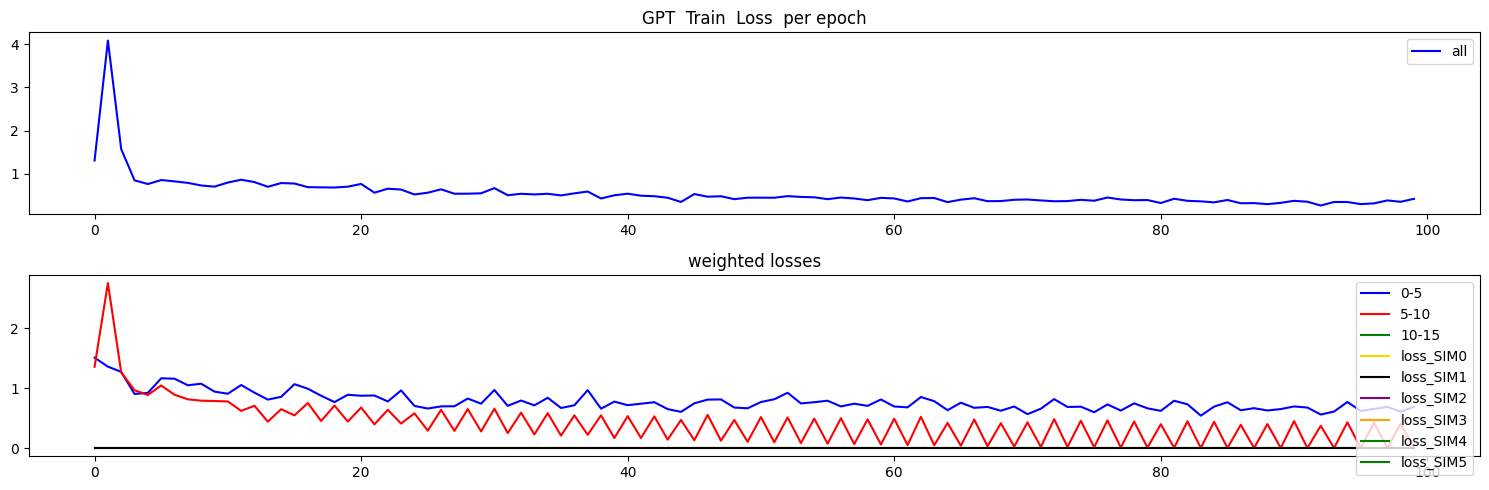

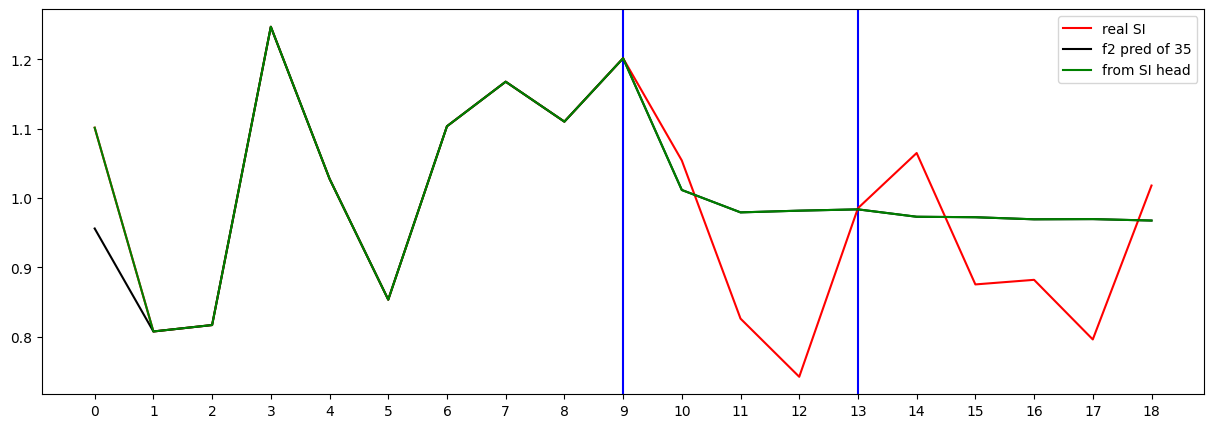

Testing R**2 - (all) - (no inputs):  0.9877733140134922
Testing R**2 - (f2) - SI full (no inputs):  -0.3008485195267643
Testing R**2 - SI head only (no inputs):  -0.3008485195267643
0 ...index R**2 (no inputs):  0.13217703654198898
1 ...index R**2 (no inputs):  -1.4428231596163323
2 ...index R**2 (no inputs):  -0.3008485195267643
3 ...index R**2 (no inputs):  -433.84004303736117
4 ...index R**2 (no inputs):  -2.8899757373198347
5 ...index R**2 (no inputs):  -0.42502178904972454
6 ...index R**2 (no inputs):  -479.6578950185579
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.021077533422871553
10 ...index R**2 (no inputs):  0.030136809305827073
11 ...index R**2 (no inputs):  -23.064672232637886
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  0.03797429098854843
16 ...index R**2 (no inputs):  -1.8354926039907236
17 ...index R**2 (no inputs):  -371.241

In [39]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk000to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 4


In [40]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.022172
Loss_SI: 1.3204669952392578 Loss_all: 1.1356925964355469
===


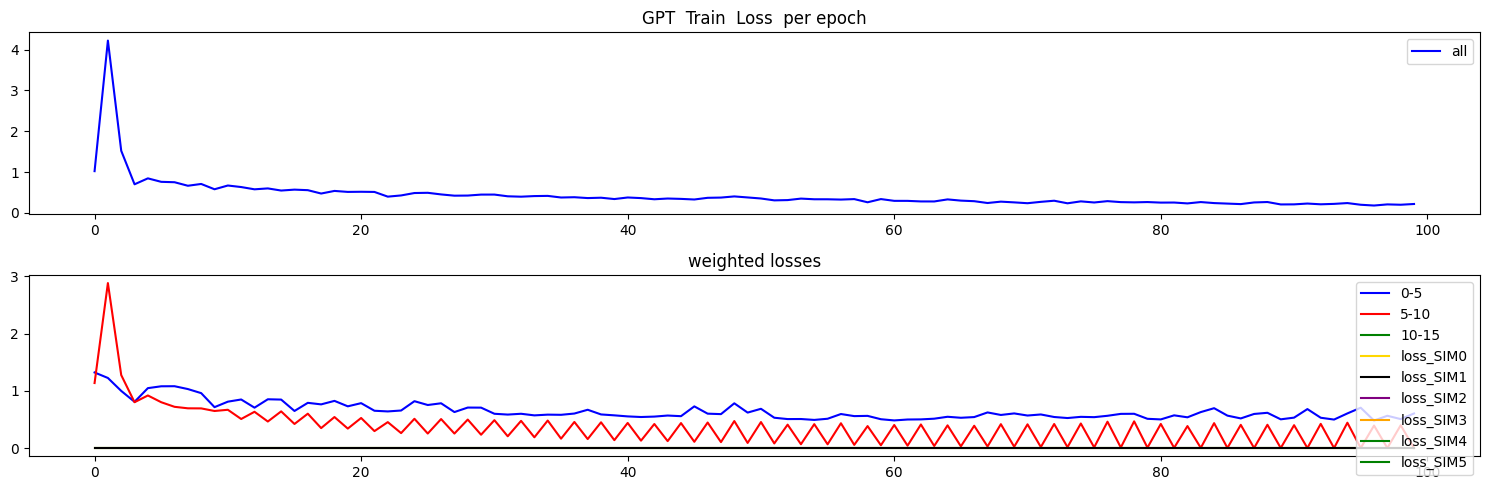

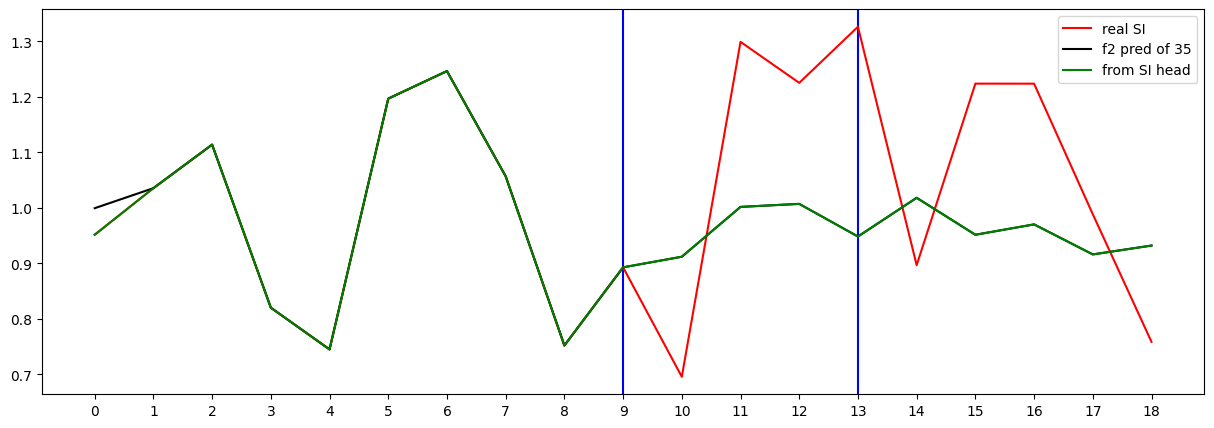

Testing R**2 - (all) - (no inputs):  0.9773322865942864
Testing R**2 - (f2) - SI full (no inputs):  -0.3542926314753454
Testing R**2 - SI head only (no inputs):  -0.3542926314753454
0 ...index R**2 (no inputs):  0.23644362969134913
1 ...index R**2 (no inputs):  -1.00701519811392
2 ...index R**2 (no inputs):  -0.3542926314753454
3 ...index R**2 (no inputs):  -35.59675582135907
4 ...index R**2 (no inputs):  -0.237081752673183
5 ...index R**2 (no inputs):  -0.8761621523715228
6 ...index R**2 (no inputs):  -1.0984389222779267
7 ...index R**2 (no inputs):  -3.516519161530325
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.2322499281712498
10 ...index R**2 (no inputs):  0.009247686280752898
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  0.18350640414676878
16 ...index R**2 (no inputs):  -0.3209256242816605
17 ...index R**2 (no inputs):  -3.68852565215

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk300to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 1.200327
Loss_SI: 1.020526647567749 Loss_all: 1.1930978298187256
===


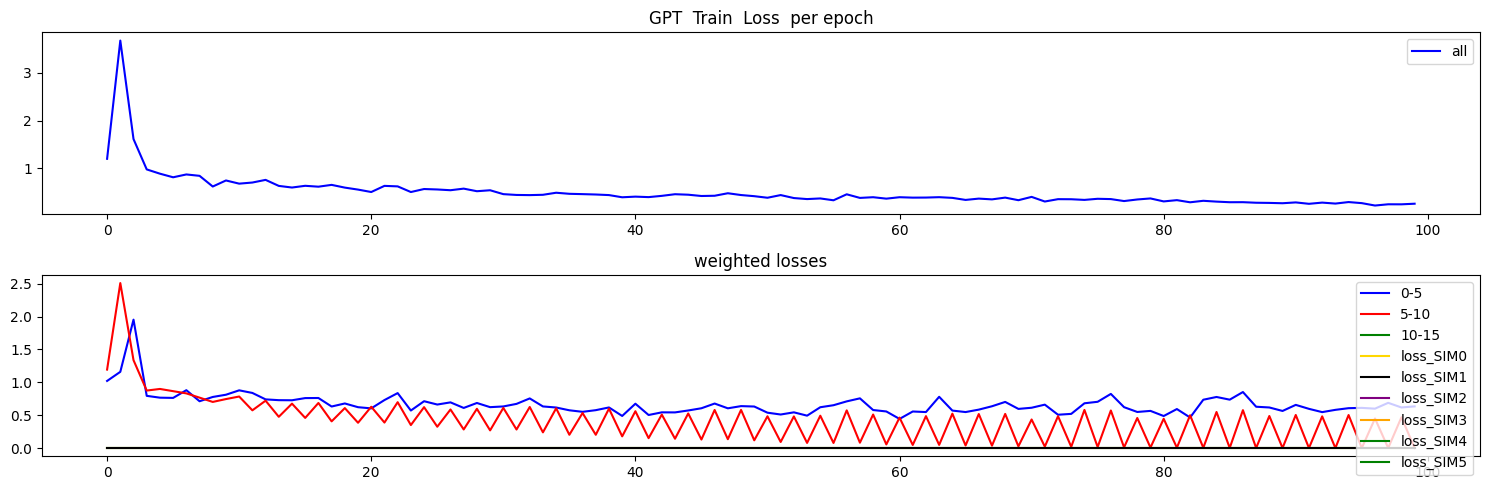

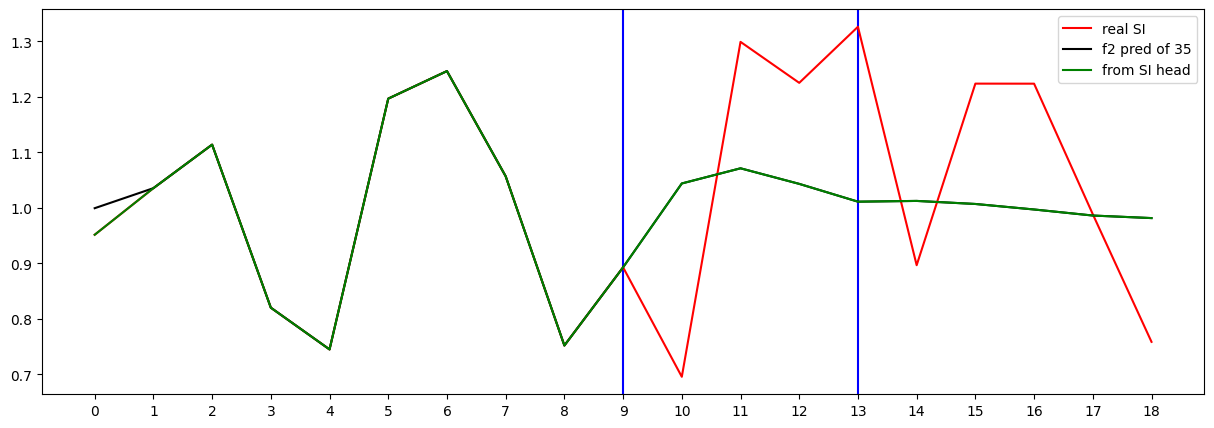

Testing R**2 - (all) - (no inputs):  0.9775488659969325
Testing R**2 - (f2) - SI full (no inputs):  0.009411799699771461
Testing R**2 - SI head only (no inputs):  0.009411799699771461
0 ...index R**2 (no inputs):  0.14905776581826502
1 ...index R**2 (no inputs):  -0.047039564510193976
2 ...index R**2 (no inputs):  0.009411799699771461
3 ...index R**2 (no inputs):  -464.2116629890766
4 ...index R**2 (no inputs):  -0.7594450887795696
5 ...index R**2 (no inputs):  -0.8574713452237512
6 ...index R**2 (no inputs):  -0.6631737660874903
7 ...index R**2 (no inputs):  -3.65915562421279
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.8971292067758909
10 ...index R**2 (no inputs):  -0.29124163385428314
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  0.017865942201400253
16 ...index R**2 (no inputs):  -0.2603638032735047
17 ...index R**2 (no inputs):  -42.32

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk200to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 1.116443
Loss_SI: 0.9855508208274841 Loss_all: 1.16301691532135
===


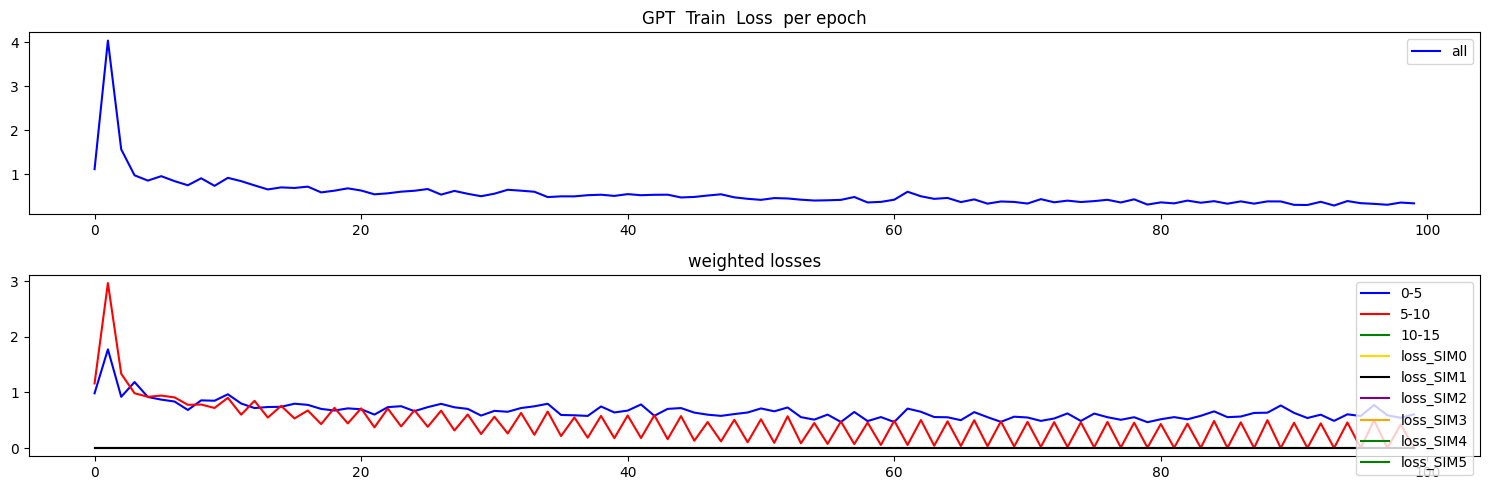

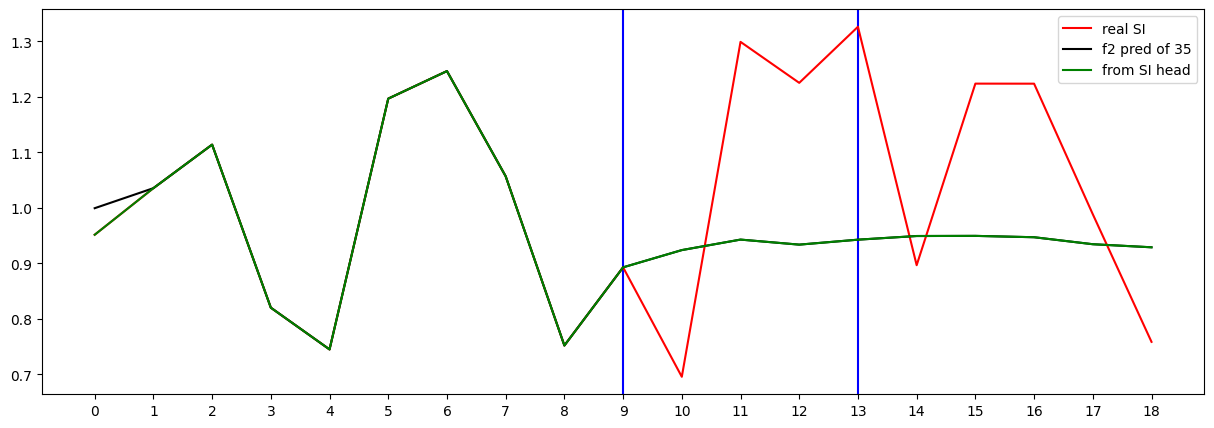

Testing R**2 - (all) - (no inputs):  0.9745976360422682
Testing R**2 - (f2) - SI full (no inputs):  -0.700763875178958
Testing R**2 - SI head only (no inputs):  -0.700763875178958
0 ...index R**2 (no inputs):  -0.004173825574277146
1 ...index R**2 (no inputs):  -0.8455758233809887
2 ...index R**2 (no inputs):  -0.700763875178958
3 ...index R**2 (no inputs):  -297.5847958128787
4 ...index R**2 (no inputs):  -0.12961068922852959
5 ...index R**2 (no inputs):  -1.102525951343102
6 ...index R**2 (no inputs):  -0.05760737215889633
7 ...index R**2 (no inputs):  -1.8283038126372393
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.28005910275638457
10 ...index R**2 (no inputs):  -0.3592310253917248
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.37223469941240017
16 ...index R**2 (no inputs):  -0.21759400793918227
17 ...index R**2 (no inputs):  -11.1745

In [43]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                              chunk100to400_train,
                              reasoning_steps=10,
                              backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 1.429639
Loss_SI: 1.5731604099273682 Loss_all: 1.341780424118042
===


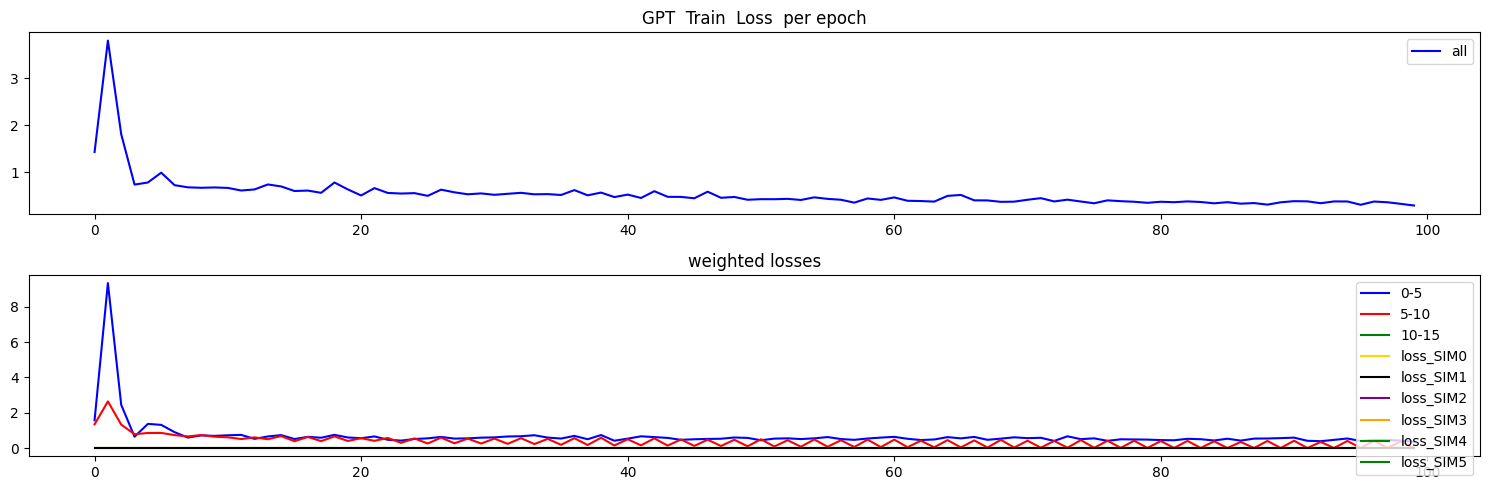

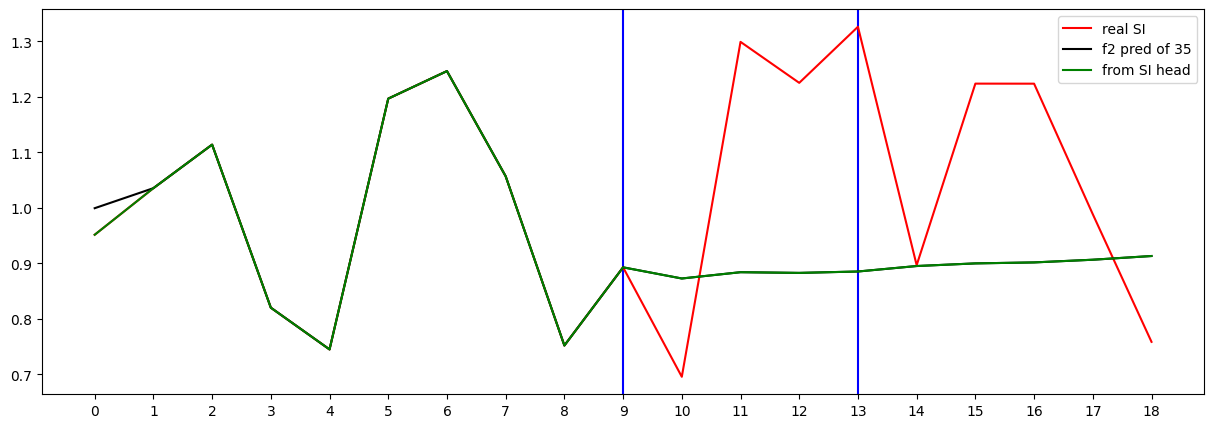

Testing R**2 - (all) - (no inputs):  0.9427379363533336
Testing R**2 - (f2) - SI full (no inputs):  -1.2415853096996465
Testing R**2 - SI head only (no inputs):  -1.2415853096996465
0 ...index R**2 (no inputs):  -0.05000948472609834
1 ...index R**2 (no inputs):  -1.4128108192971474
2 ...index R**2 (no inputs):  -1.2415853096996465
3 ...index R**2 (no inputs):  -488.7803980036759
4 ...index R**2 (no inputs):  -1.3686203107536805
5 ...index R**2 (no inputs):  -3.7371788450909635
6 ...index R**2 (no inputs):  -0.38026673464486405
7 ...index R**2 (no inputs):  -3.079659099605191
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.25888319343357
10 ...index R**2 (no inputs):  -0.2905624247992096
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.10933740838998607
16 ...index R**2 (no inputs):  0.020466011567438214
17 ...index R**2 (no inputs):  -22.698319

In [44]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk000to400_train, 
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 5


In [45]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.199290
Loss_SI: 1.380231261253357 Loss_all: 1.2342725992202759
===


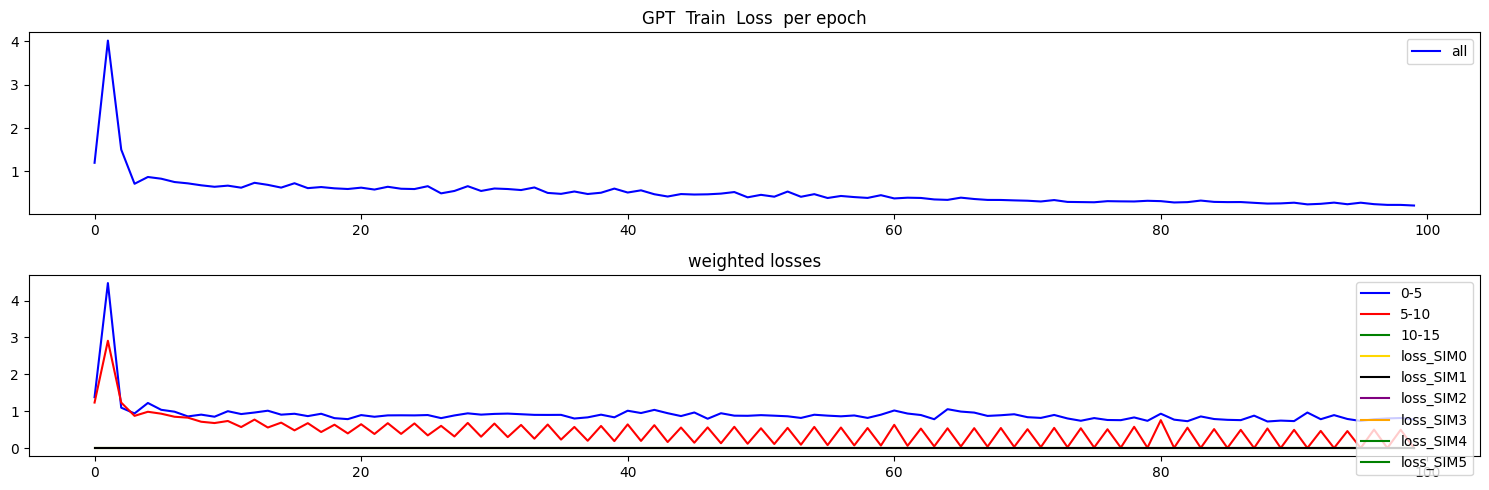

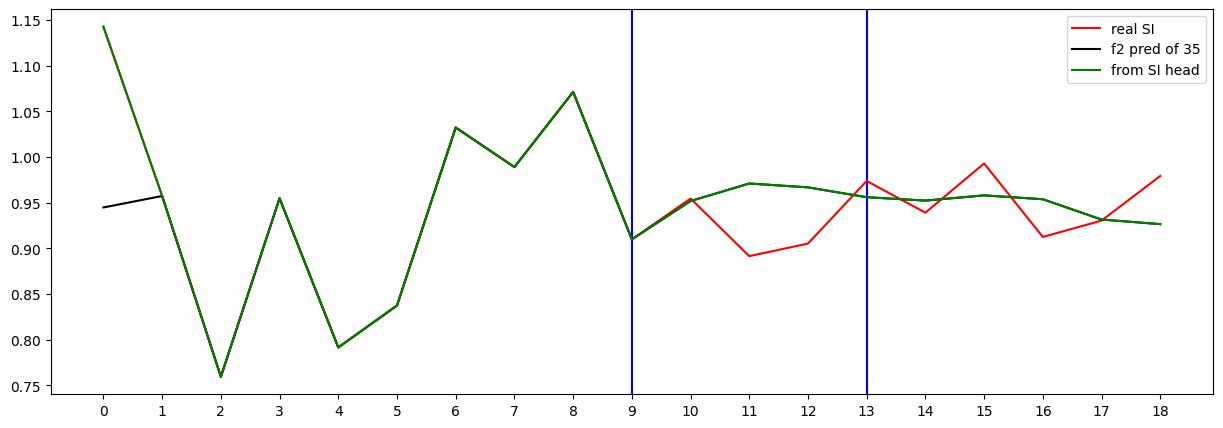

Testing R**2 - (all) - (no inputs):  0.99458765412039
Testing R**2 - (f2) - SI full (no inputs):  -0.33286231390103915
Testing R**2 - SI head only (no inputs):  -0.33286231390103915
0 ...index R**2 (no inputs):  -0.6254028776417382
1 ...index R**2 (no inputs):  -0.6087687484477184
2 ...index R**2 (no inputs):  -0.33286231390103915
3 ...index R**2 (no inputs):  -59.401349720318564
4 ...index R**2 (no inputs):  -0.7267460903758245
5 ...index R**2 (no inputs):  -2.7149554312594724
6 ...index R**2 (no inputs):  -884.2635643528052
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.03660779555535454
10 ...index R**2 (no inputs):  -0.11460407431533559
11 ...index R**2 (no inputs):  -44.58313495100801
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.16636013909130964
16 ...index R**2 (no inputs):  0.08508416969283383
17 ...index R**2 (no inputs):  -107.518

In [46]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 1.151803
Loss_SI: 1.4132776260375977 Loss_all: 1.2009086608886719
===


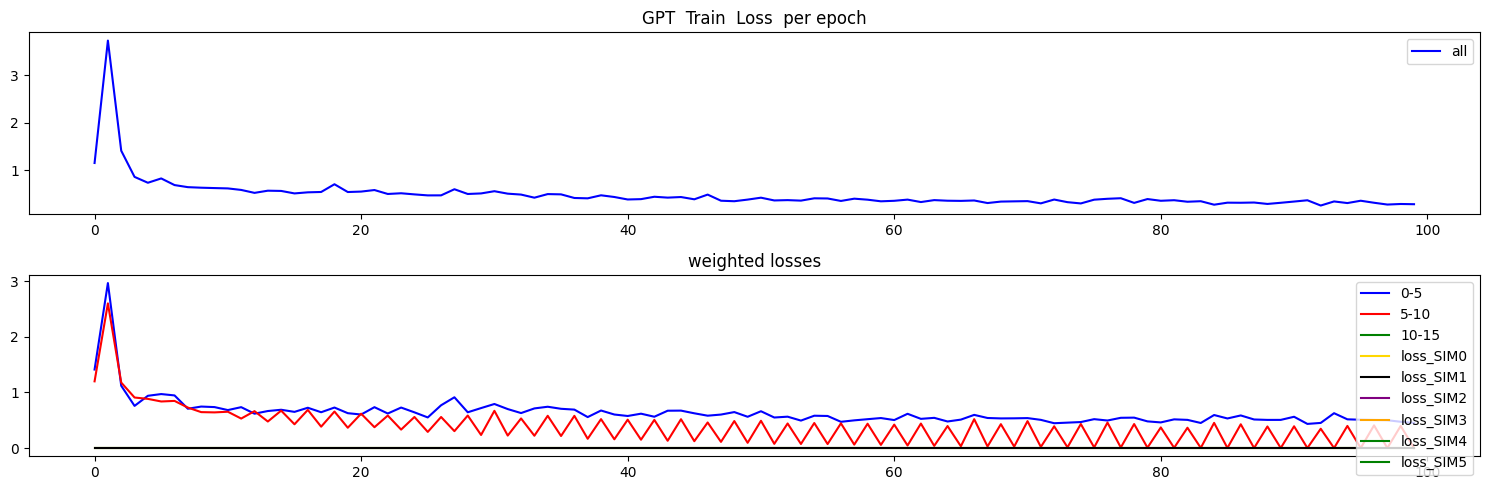

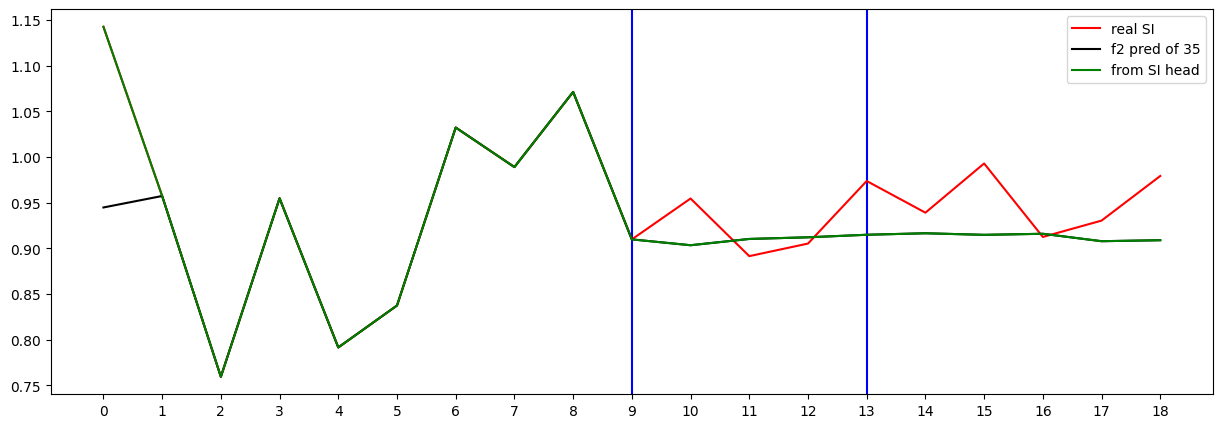

Testing R**2 - (all) - (no inputs):  0.9971435802406055
Testing R**2 - (f2) - SI full (no inputs):  -0.5228617952832728
Testing R**2 - SI head only (no inputs):  -0.5228617952832728
0 ...index R**2 (no inputs):  -0.15000604617101043
1 ...index R**2 (no inputs):  -0.049481095598782554
2 ...index R**2 (no inputs):  -0.5228617952832728
3 ...index R**2 (no inputs):  -6.2370727622698245
4 ...index R**2 (no inputs):  -73.46328186228288
5 ...index R**2 (no inputs):  -0.95555367909213
6 ...index R**2 (no inputs):  -468.49926606046904
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.009915794925595467
10 ...index R**2 (no inputs):  0.03382046861356558
11 ...index R**2 (no inputs):  -90.01006577386703
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.0958241866932164
16 ...index R**2 (no inputs):  -0.1860171136361699
17 ...index R**2 (no inputs):  -37.21390

In [47]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.292390
Loss_SI: 1.4521856307983398 Loss_all: 1.317294716835022
===


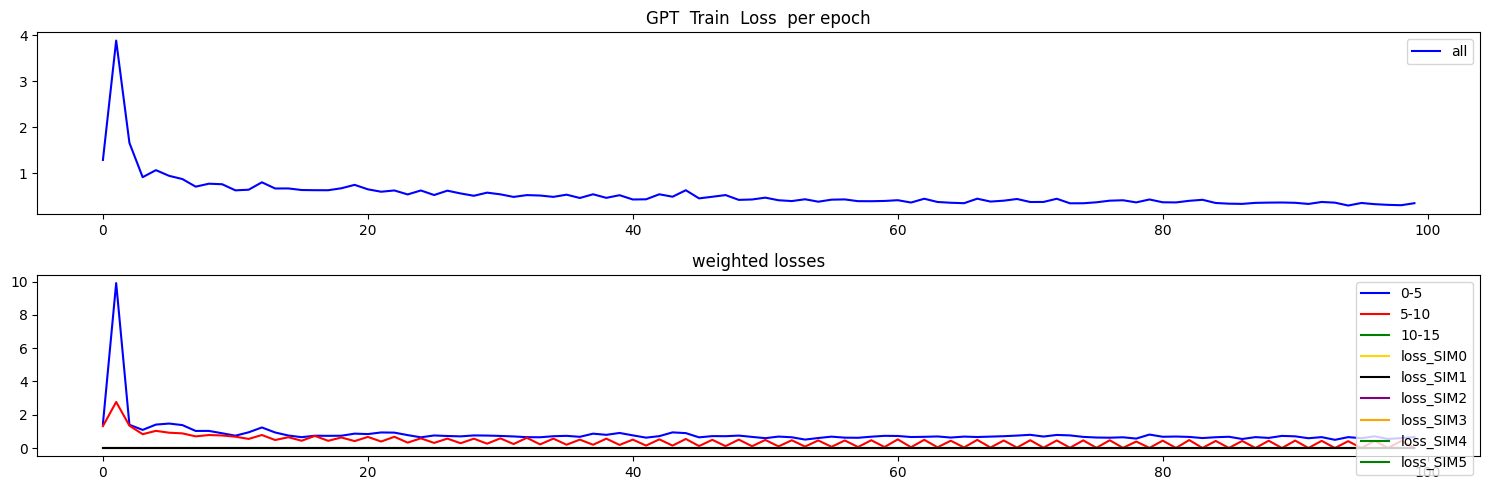

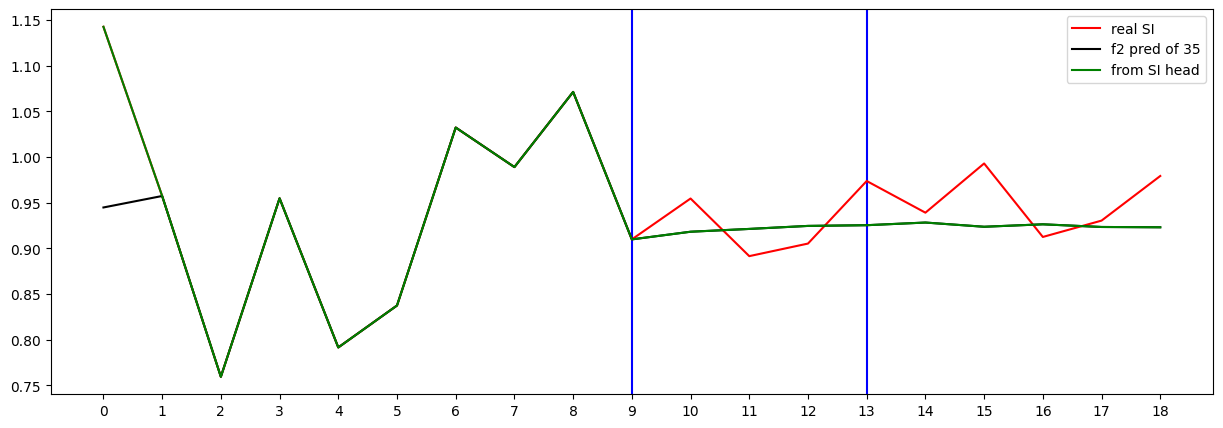

Testing R**2 - (all) - (no inputs):  0.9913705913946239
Testing R**2 - (f2) - SI full (no inputs):  -0.2823558478508712
Testing R**2 - SI head only (no inputs):  -0.2823558478508712
0 ...index R**2 (no inputs):  -0.05142657075416568
1 ...index R**2 (no inputs):  -0.21842666312464853
2 ...index R**2 (no inputs):  -0.2823558478508712
3 ...index R**2 (no inputs):  -40.529981529546255
4 ...index R**2 (no inputs):  -2.8032279932417477
5 ...index R**2 (no inputs):  -4.925881537418935
6 ...index R**2 (no inputs):  -1110.067009422787
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.005195228036192434
10 ...index R**2 (no inputs):  -0.10514175611785848
11 ...index R**2 (no inputs):  -80.91814197158952
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.4629754806678228
16 ...index R**2 (no inputs):  -0.0473126444585692
17 ...index R**2 (no inputs):  -138.048

In [48]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 1.130144
Loss_SI: 1.1999952793121338 Loss_all: 1.2057535648345947
===


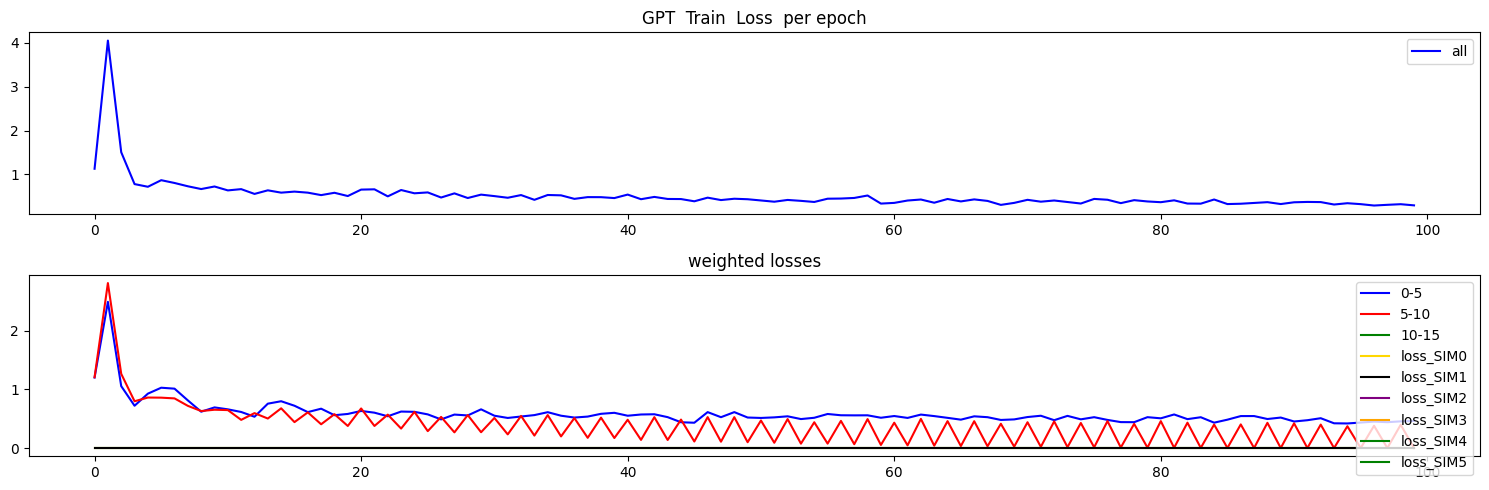

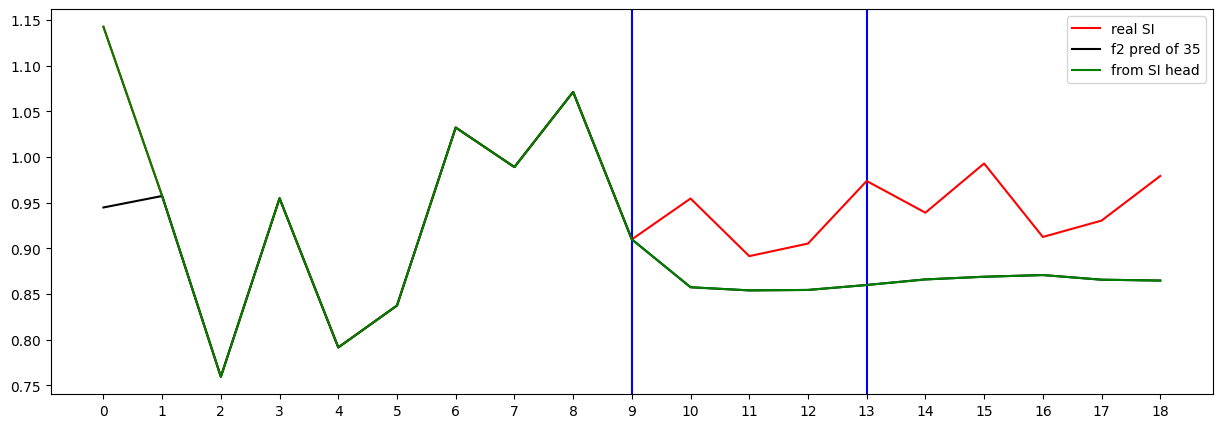

Testing R**2 - (all) - (no inputs):  0.9983334919735576
Testing R**2 - (f2) - SI full (no inputs):  -1.9444837806873543
Testing R**2 - SI head only (no inputs):  -1.9444837806873543
0 ...index R**2 (no inputs):  -0.02302266170266498
1 ...index R**2 (no inputs):  -0.19508556201255467
2 ...index R**2 (no inputs):  -1.9444837806873543
3 ...index R**2 (no inputs):  -5.670404714673012
4 ...index R**2 (no inputs):  -1.3977737651245548
5 ...index R**2 (no inputs):  -0.12446091559303718
6 ...index R**2 (no inputs):  -1205.3319935658005
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.01754934508875139
10 ...index R**2 (no inputs):  -0.011259106683203957
11 ...index R**2 (no inputs):  -0.2849957882406047
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.6512814968311273
16 ...index R**2 (no inputs):  -0.3080029507560538
17 ...index R**2 (no inputs):  -105.

In [49]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 6


In [50]:


chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()



[0] Train Loss: 1.079370
Loss_SI: 1.2171090841293335 Loss_all: 1.1507048606872559
===


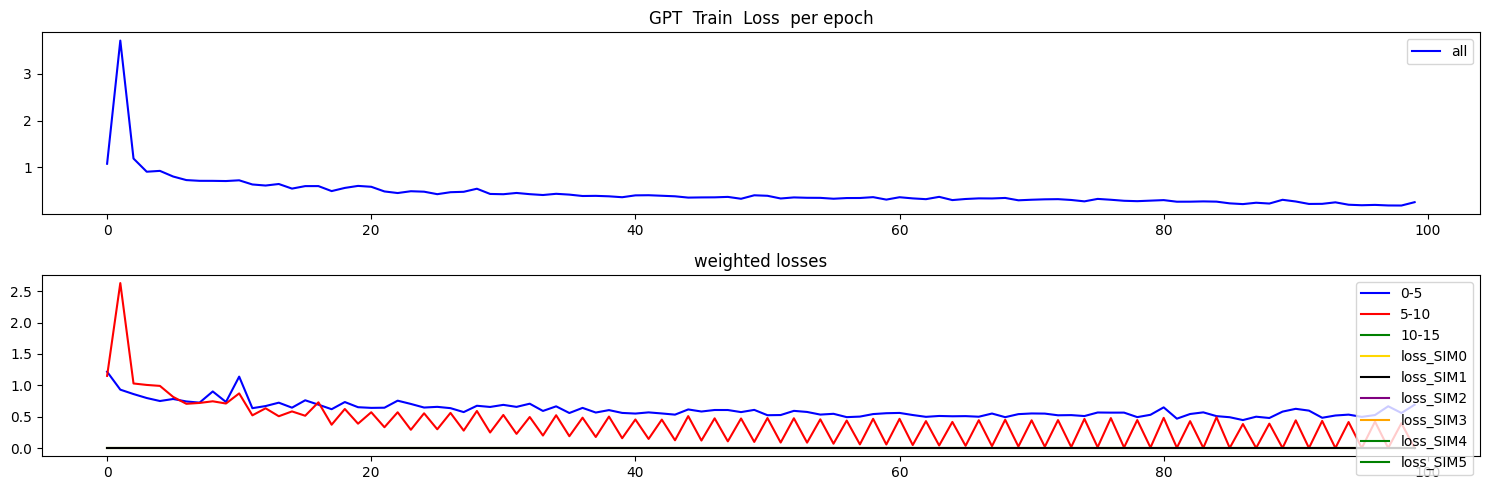

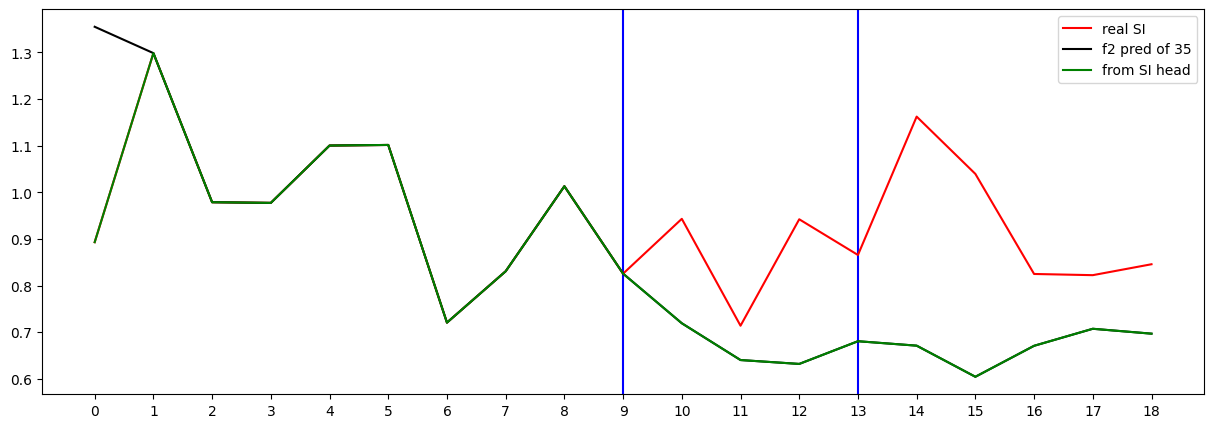

Testing R**2 - (all) - (no inputs):  0.9494358692826531
Testing R**2 - (f2) - SI full (no inputs):  -3.57314753440743
Testing R**2 - SI head only (no inputs):  -3.57314753440743
0 ...index R**2 (no inputs):  -0.7771316395960159
1 ...index R**2 (no inputs):  -1.9852411947934816
2 ...index R**2 (no inputs):  -3.57314753440743
3 ...index R**2 (no inputs):  0.28358497537795513
4 ...index R**2 (no inputs):  -0.1762110275508597
5 ...index R**2 (no inputs):  -2.5926195701958874
6 ...index R**2 (no inputs):  -1112.217309904779
7 ...index R**2 (no inputs):  -265.16460315020464
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.0729704392377577
10 ...index R**2 (no inputs):  -4.672007639413873
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.5779637670172
16 ...index R**2 (no inputs):  -1.3852699787077687
17 ...index R**2 (no inputs):  -257.04263835764783
1

In [51]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )



[0] Train Loss: 1.199684
Loss_SI: 0.9306091666221619 Loss_all: 1.2620656490325928
===


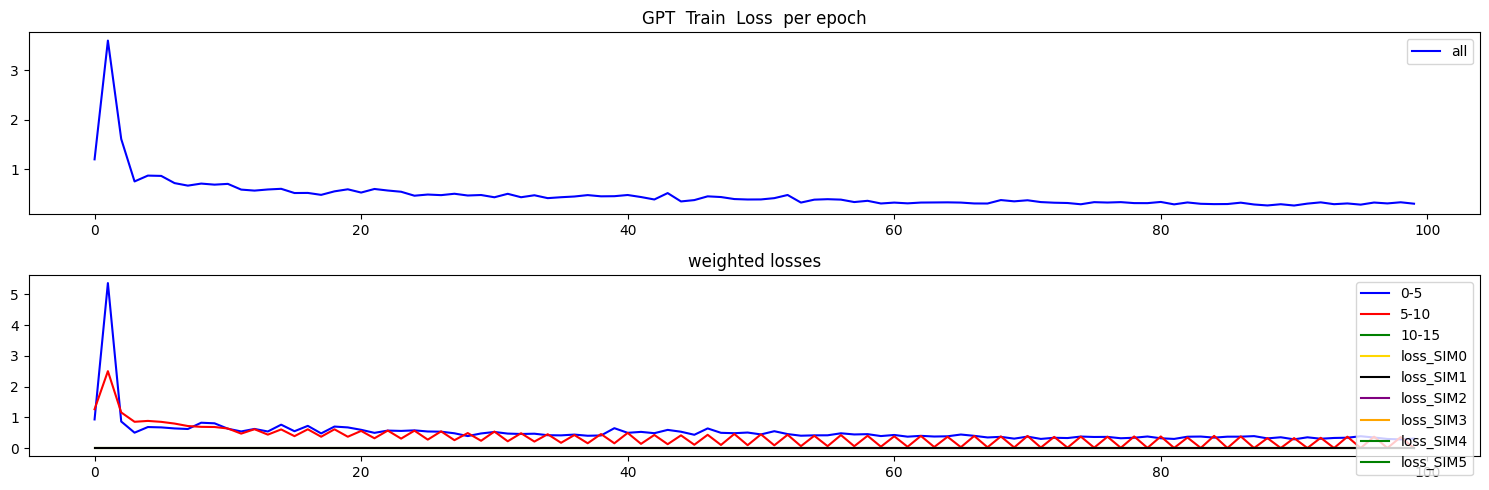

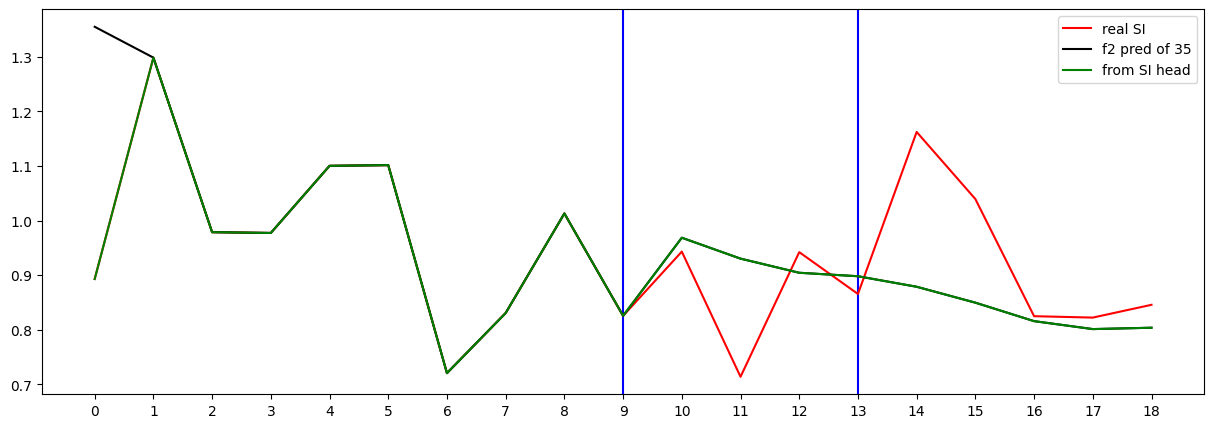

Testing R**2 - (all) - (no inputs):  0.9720817451042565
Testing R**2 - (f2) - SI full (no inputs):  -0.2294936418246436
Testing R**2 - SI head only (no inputs):  -0.2294936418246436
0 ...index R**2 (no inputs):  -0.12065815174715278
1 ...index R**2 (no inputs):  0.04325522037787344
2 ...index R**2 (no inputs):  -0.2294936418246436
3 ...index R**2 (no inputs):  -0.04114113602598235
4 ...index R**2 (no inputs):  -26.954409918250853
5 ...index R**2 (no inputs):  -0.9803933471965236
6 ...index R**2 (no inputs):  -247.52734193872323
7 ...index R**2 (no inputs):  -1287.1033360513834
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.040785796908004324
10 ...index R**2 (no inputs):  -0.25539657831952134
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.7993695890349368
16 ...index R**2 (no inputs):  -0.7280734821036265
17 ...index R**2 (no inputs):  -363.3

In [52]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.648815
Loss_SI: 1.966636061668396 Loss_all: 1.5246679782867432
===


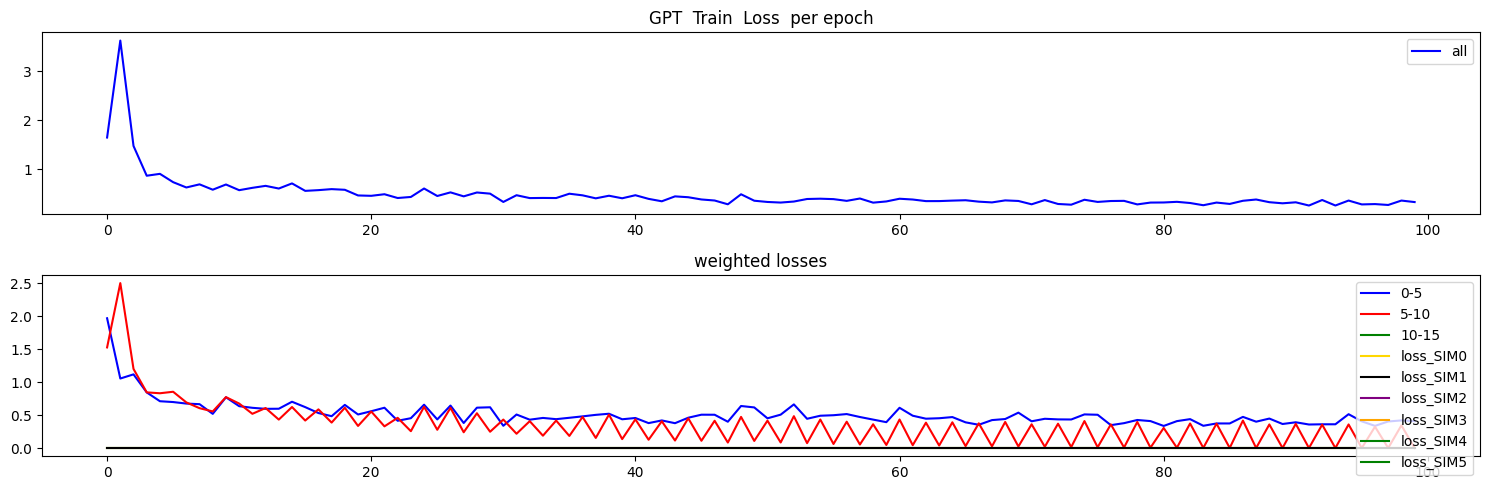

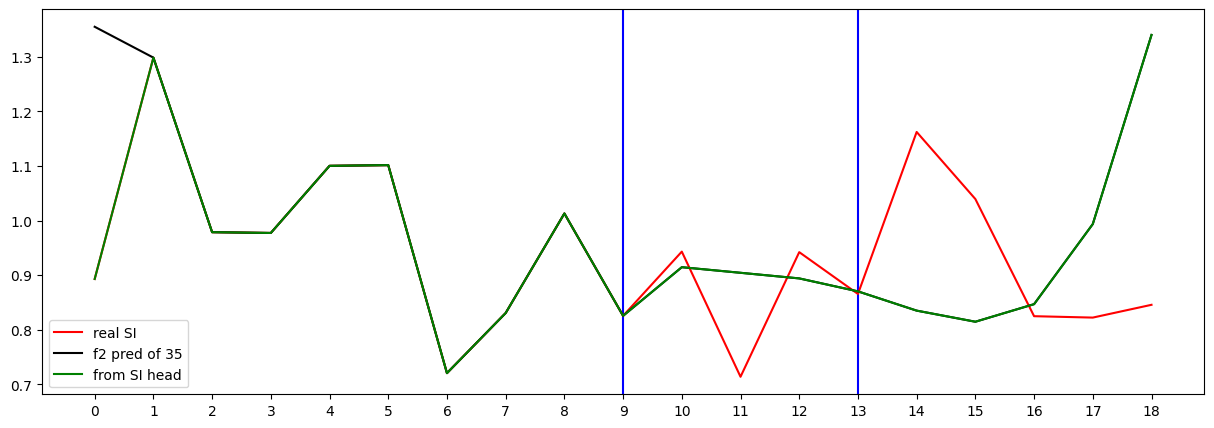

Testing R**2 - (all) - (no inputs):  0.8367838208704999
Testing R**2 - (f2) - SI full (no inputs):  -1.789314585263583
Testing R**2 - SI head only (no inputs):  -1.789314585263583
0 ...index R**2 (no inputs):  -0.5332915354987329
1 ...index R**2 (no inputs):  -0.6302268837311291
2 ...index R**2 (no inputs):  -1.789314585263583
3 ...index R**2 (no inputs):  -0.2863399982270043
4 ...index R**2 (no inputs):  -171.18432420938353
5 ...index R**2 (no inputs):  -10.572910224195105
6 ...index R**2 (no inputs):  -100.14760291852056
7 ...index R**2 (no inputs):  -1772.1600728774847
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.03979335103859705
10 ...index R**2 (no inputs):  -0.8548305594155294
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.9594263187648293
16 ...index R**2 (no inputs):  -7.160182067951087
17 ...index R**2 (no inputs):  -1890.41931760

In [53]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )



[0] Train Loss: 1.269068
Loss_SI: 1.2319635152816772 Loss_all: 1.2589969635009766
===


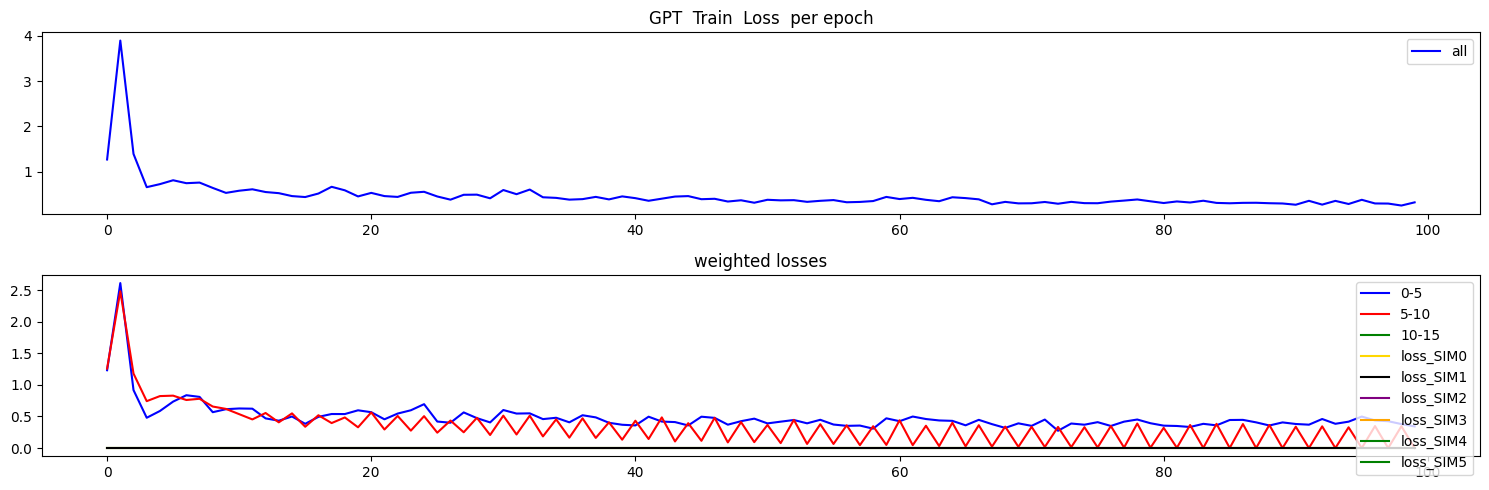

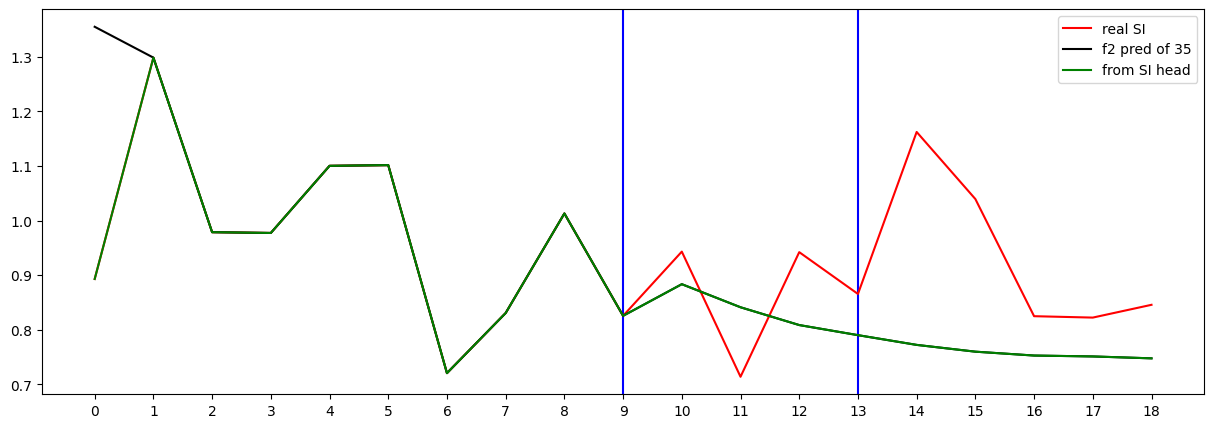

Testing R**2 - (all) - (no inputs):  0.8663129321490065
Testing R**2 - (f2) - SI full (no inputs):  -1.0724664694982033
Testing R**2 - SI head only (no inputs):  -1.0724664694982033
0 ...index R**2 (no inputs):  -0.07800691587938324
1 ...index R**2 (no inputs):  -0.8556518957599282
2 ...index R**2 (no inputs):  -1.0724664694982033
3 ...index R**2 (no inputs):  -0.5831522071216741
4 ...index R**2 (no inputs):  -601.3933888848829
5 ...index R**2 (no inputs):  -8.499928319107582
6 ...index R**2 (no inputs):  -626.2270136719548
7 ...index R**2 (no inputs):  -9715.6221289832
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.0089835913494275
10 ...index R**2 (no inputs):  -0.6319139140569969
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.17158422993111633
16 ...index R**2 (no inputs):  -0.6719254701585011
17 ...index R**2 (no inputs):  -1521.453065753

In [54]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## R2 over accumulated Runs


In [55]:

from sklearn.metrics import r2_score


real_si_concat_300to400 = np.concatenate(all_real_si_300to400)
pred_si_concat_300to400 = np.concatenate(all_pred_si_300to400)

real_si_concat_200to400 = np.concatenate(all_real_si_200to400)
pred_si_concat_200to400 = np.concatenate(all_pred_si_200to400)

real_si_concat_100to400 = np.concatenate(all_real_si_100to400)
pred_si_concat_100to400 = np.concatenate(all_pred_si_100to400)

real_si_concat_000to400 = np.concatenate(all_real_si_000to400)
pred_si_concat_000to400 = np.concatenate(all_pred_si_000to400)


In [56]:


r2 = r2_score(real_si_concat_300to400, pred_si_concat_300to400 )

print("Accumulated R² 300to400:", r2)


Accumulated R² 300to400: -0.6769336225015088


In [57]:

r2 = r2_score(real_si_concat_200to400, pred_si_concat_200to400 )

print("Accumulated R² 200to400:", r2)


Accumulated R² 200to400: -0.3003674765130011


In [58]:

r2 = r2_score(real_si_concat_100to400, pred_si_concat_100to400 )

print("Accumulated R² 100to400:", r2)


Accumulated R² 100to400: -0.26846844879204745


In [59]:

r2 = r2_score(real_si_concat_000to400, pred_si_concat_000to400 )

print("Accumulated R² 000to400:", r2)


Accumulated R² 000to400: -0.431615062375438



## First Few R2


In [60]:

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

def time_series_metrics(y_true, y_pred):
    """
    y_true: numpy array of shape (N,)
    y_pred: numpy array of shape (N,)
    """
    y_true = np.asarray(y_true).flatten()
    y_pred = np.asarray(y_pred).flatten()

    # Ensure proper alignment
    assert y_true.shape == y_pred.shape, "Mismatched shapes"

    # Naive forecast (lag-1)
    y_naive = np.roll(y_true, 1)
    y_naive[0] = y_true[0]

    # Errors
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)

    # Naive R²
    ss_res = np.sum((y_true - y_pred)**2)
    ss_naive = np.sum((y_true - y_naive)**2)
    naive_r2 = 1 - ss_res / ss_naive

    # MASE (mean absolute scaled error)
    mae_naive = np.mean(np.abs(y_true[1:] - y_true[:-1])) + 1e-8  # avoid div-by-zero
    mase = np.mean(np.abs(y_true - y_pred)) / mae_naive

    metrics = {
        "RMSE": rmse,
        "MAE": mae,
        "Naive_R2": naive_r2,
        "MASE": mase
    }

    print(f"Naive_R2:....................................R²: {naive_r2:.4f}")
    print(f"RMSE:{rmse:.4f},MAE:{mae:.4f},MASE:{mase:.4f}")
    
    ## for k, v in metrics.items():
    ##     print(f"{k}: {v:.4f}")
    




In [61]:

from sklearn.metrics import r2_score
import numpy as np


def print_first_few_R2_individual( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    start =  THE_FIRST_FEW - 1
    for i in range( start, len(real), 9 ):
        real_first4.append(real[i])
        pred_first4.append(pred[i])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".......................R² on just step n - R²:", r2_first4)
    
    time_series_metrics(real_first4, pred_first4)


def print_first_few_R2( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    for i in range(0, len(real), 9):
        real_first4.extend(real[i:i+first_n])
        pred_first4.extend(pred[i:i+first_n])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".....................R² on first n steps - R²:", r2_first4)
    
    
    time_series_metrics(real_first4, pred_first4)
    
    print_first_few_R2_individual( real_si_concat, pred_si_concat, THE_FIRST_FEW )
    
    print('===================================================================')
    

    


In [62]:

print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 1 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 2 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 3 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 4 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 5 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 6 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 7 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 8 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 9 )


1 .....................R² on first n steps - R²: -0.3105149230739328
Naive_R2:....................................R²: 0.4588
RMSE:0.2197,MAE:0.1814,MASE:0.5922
1 .......................R² on just step n - R²: -0.3105149230739328
Naive_R2:....................................R²: 0.4588
RMSE:0.2197,MAE:0.1814,MASE:0.5922
2 .....................R² on first n steps - R²: -0.388216856203925
Naive_R2:....................................R²: 0.1760
RMSE:0.2114,MAE:0.1715,MASE:0.8994
2 .......................R² on just step n - R²: -0.5150551251496573
Naive_R2:....................................R²: 0.4263
RMSE:0.2029,MAE:0.1616,MASE:0.6432
3 .....................R² on first n steps - R²: -0.297033786480561
Naive_R2:....................................R²: -0.0844
RMSE:0.1966,MAE:0.1497,MASE:0.9663
3 .......................R² on just step n - R²: -0.22410278061226574
Naive_R2:....................................R²: 0.4180
RMSE:0.1630,MAE:0.1062,MASE:0.5433
4 .....................R² on first n ste

In [63]:

print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 1 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 2 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 3 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 4 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 5 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 6 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 7 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 8 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 9 )


1 .....................R² on first n steps - R²: 0.14017128480232
Naive_R2:....................................R²: 0.6449
RMSE:0.1779,MAE:0.1431,MASE:0.4673
1 .......................R² on just step n - R²: 0.14017128480232
Naive_R2:....................................R²: 0.6449
RMSE:0.1779,MAE:0.1431,MASE:0.4673
2 .....................R² on first n steps - R²: -0.22660937751800003
Naive_R2:....................................R²: 0.2719
RMSE:0.1987,MAE:0.1505,MASE:0.7894
2 .......................R² on just step n - R²: -0.7427225681714451
Naive_R2:....................................R²: 0.3401
RMSE:0.2176,MAE:0.1579,MASE:0.6286
3 .....................R² on first n steps - R²: -0.4349422602904389
Naive_R2:....................................R²: -0.1998
RMSE:0.2068,MAE:0.1506,MASE:0.9718
3 .......................R² on just step n - R²: -1.2713351039473402
Naive_R2:....................................R²: -0.0799
RMSE:0.2221,MAE:0.1507,MASE:0.7708
4 .....................R² on first n steps 

In [64]:

print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 1 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 2 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 3 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 4 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 5 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 6 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 7 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 8 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 9 )



1 .....................R² on first n steps - R²: -0.06960844557050994
Naive_R2:....................................R²: 0.5583
RMSE:0.1984,MAE:0.1660,MASE:0.5420
1 .......................R² on just step n - R²: -0.06960844557050994
Naive_R2:....................................R²: 0.5583
RMSE:0.1984,MAE:0.1660,MASE:0.5420
2 .....................R² on first n steps - R²: -0.06718715531342934
Naive_R2:....................................R²: 0.3665
RMSE:0.1854,MAE:0.1512,MASE:0.7931
2 .......................R² on just step n - R²: -0.08045731188614291
Naive_R2:....................................R²: 0.5909
RMSE:0.1713,MAE:0.1364,MASE:0.5430
3 .....................R² on first n steps - R²: -0.10753588639648326
Naive_R2:....................................R²: 0.0740
RMSE:0.1817,MAE:0.1385,MASE:0.8937
3 .......................R² on just step n - R²: -0.3958546635853788
Naive_R2:....................................R²: 0.3363
RMSE:0.1741,MAE:0.1130,MASE:0.5779
4 .....................R² on first 

In [65]:

print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 1 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 2 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 3 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 4 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 5 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 6 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 7 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 8 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 9 )


1 .....................R² on first n steps - R²: -0.22908189123453093
Naive_R2:....................................R²: 0.4924
RMSE:0.2127,MAE:0.1734,MASE:0.5661
1 .......................R² on just step n - R²: -0.22908189123453093
Naive_R2:....................................R²: 0.4924
RMSE:0.2127,MAE:0.1734,MASE:0.5661
2 .....................R² on first n steps - R²: -0.32399637052869656
Naive_R2:....................................R²: 0.2141
RMSE:0.2065,MAE:0.1737,MASE:0.9111
2 .......................R² on just step n - R²: -0.47316635033229826
Naive_R2:....................................R²: 0.4422
RMSE:0.2000,MAE:0.1741,MASE:0.6928
3 .....................R² on first n steps - R²: -0.3967220566345204
Naive_R2:....................................R²: -0.1678
RMSE:0.2040,MAE:0.1600,MASE:1.0326
3 .......................R² on just step n - R²: -0.8251022972913431
Naive_R2:....................................R²: 0.1323
RMSE:0.1991,MAE:0.1325,MASE:0.6779
4 .....................R² on first 


## Plot


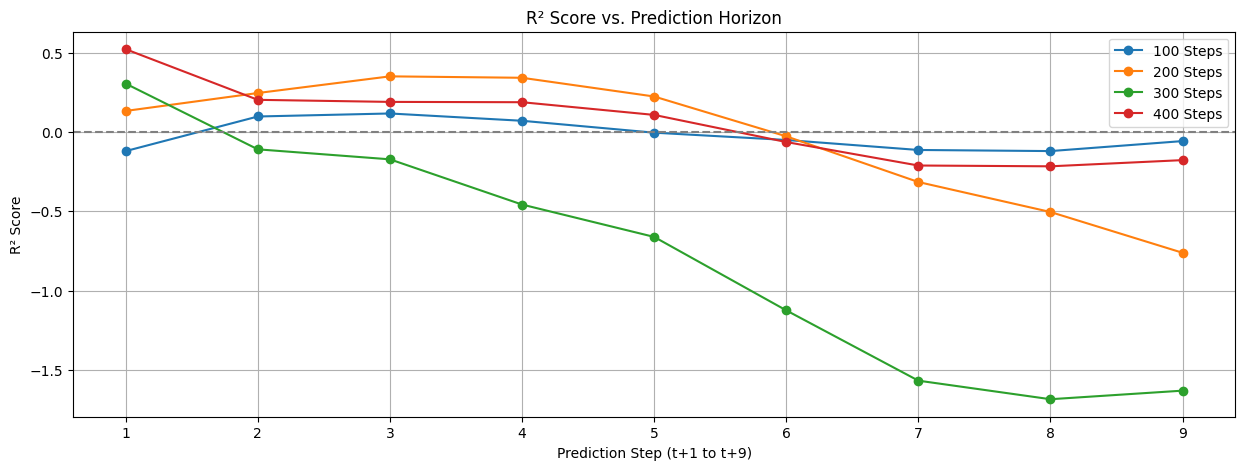

In [66]:

import matplotlib.pyplot as plt

def plot_r2_curves():
    steps = list(range(1, 10))

    r2_100 = [-0.121, 0.097, 0.116, 0.070, -0.005, -0.051, -0.114, -0.121, -0.058]
    r2_200 = [0.132, 0.245, 0.350, 0.341, 0.223, -0.028, -0.316, -0.505, -0.762]
    r2_300 = [0.304, -0.110, -0.173, -0.458, -0.662, -1.125, -1.568, -1.685, -1.631]
    r2_400 = [0.521, 0.202, 0.189, 0.187, 0.107, -0.064, -0.212, -0.217, -0.178]

    plt.plot(steps, r2_100, marker='o', label='100 Steps')
    plt.plot(steps, r2_200, marker='o', label='200 Steps')
    plt.plot(steps, r2_300, marker='o', label='300 Steps')
    plt.plot(steps, r2_400, marker='o', label='400 Steps')

    plt.title("R² Score vs. Prediction Horizon")
    plt.xlabel("Prediction Step (t+1 to t+9)")
    plt.ylabel("R² Score")
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='gray', linestyle='--')
    plt.show()


plot_r2_curves()
    
